# Data Processing

In [ ]:
%%capture
! unzip IMFDB_final.zip

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/image_data_cleaned.csv")
df.head()
df['Makeup '] = df['Makeup '].apply(lambda x: 'PARTIAL' if x != 'OVER' else x)
print(df['Makeup '].unique())
print(df['Illumination '].unique())
print(df['Age '].unique())
print(df['Occlusion '].unique())
print(df['Pose '].unique())
print(df['Expressions '].unique())


df = df[df['Illumination '] != 'YOUNG']
age_counts = df['Age '].value_counts()

# Print the count for 'FRONTAL'
frontal_count = age_counts.get('FRONTAL', 0)
print(f"Number of times 'FRONTAL' appears in the 'Age ' category: {frontal_count}")

MIDDDLE_count = age_counts.get('MIDDDLE', 0)
print(f"Number of times 'MIDDDLE' appears in the 'Age ' category: {MIDDDLE_count}")

Expressions_counts = df['Expressions '].value_counts()
Neutral_count = Expressions_counts.get('NEUTRAL', 0)
print(f"Number of times 'Neutral' appears in the 'Expressions ' category: {Neutral_count}")


nan_count = df['Pose '].isna().sum()
print(f"Number of rows with 'nan' in the 'Pose ' category: {nan_count}")
# Remove rows where 'Pose ' column has nan values
df = df.dropna(subset=['Pose '])


# Delete rows where 'Age ' is 'FRONTAL'
df = df[df['Age '] != 'FRONTAL']

# Replace 'MIDDDLE' with 'MIDDLE' in 'Age '
df['Age '] = df['Age '].replace('MIDDDLE', 'MIDDLE')


print(df['Age '].unique())
print(df['Pose '].unique())


df['Age_Gender'] = df['Age '].astype(str) + "_" + df['Gender']
df['Makeup_Illumination'] = df['Makeup '].astype(str) + "_" + df['Illumination ']

# Save the changes back to the same file
df.to_csv("/content/image_data_cleaned.csv", index=False)

print(df.head())

['PARTIAL' 'OVER']
['MEDIUM' 'BAD' 'HIGH' 'YOUNG']
['YOUNG' 'OLD' 'MIDDLE' 'CHILD' 'FRONTAL' 'MIDDDLE' 'LEFT']
['NONE' 'HAND' 'OTHERS' 'BEARD' 'GLASSES' 'HAIR' 'ORNAMENTS' 'MEDIUM']
['UP' 'FRONTAL' 'LEFT' 'DOWN' 'RIGHT' nan 'PARTIAL']
['DISGUST' 'HAPPINESS' 'NEUTRAL' 'ANGER' 'SURPRISE' 'FEAR' 'SADNESS']
Number of times 'FRONTAL' appears in the 'Age ' category: 1
Number of times 'MIDDDLE' appears in the 'Age ' category: 1
Number of times 'Neutral' appears in the 'Expressions ' category: 8141
Number of rows with 'nan' in the 'Pose ' category: 1
['YOUNG' 'OLD' 'MIDDLE' 'CHILD']
['UP' 'FRONTAL' 'LEFT' 'DOWN' 'RIGHT']
       Name Gender Expressions  Occlusion  Illumination    Age     Pose   \
0  AmirKhan   MALE      DISGUST       NONE        MEDIUM  YOUNG       UP   
1  AmirKhan   MALE    HAPPINESS       HAND        MEDIUM  YOUNG  FRONTAL   
2  AmirKhan   MALE      NEUTRAL       NONE        MEDIUM  YOUNG  FRONTAL   
3  AmirKhan   MALE      NEUTRAL       NONE        MEDIUM  YOUNG     LEFT   

In [ ]:
import os
os.mkdir("train")
os.mkdir("train/MALE")
os.mkdir("train/FEMALE")
os.mkdir("test")
os.mkdir("test/MALE")
os.mkdir("test/FEMALE")

In [ ]:
from sklearn.model_selection import train_test_split
X=df
y=range(len(df))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from PIL import Image
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.metrics import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from pathlib import Path
import shutil


from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import LeakyReLU

!pip install netron
import netron



In [ ]:
batch_size = 32
IMG_SIZE = (224, 224)

# GENDER

In [ ]:
import os
os.mkdir("train/GENDER")
os.mkdir("train/GENDER/MALE")
os.mkdir("train/GENDER/FEMALE")

os.mkdir("test/GENDER")
os.mkdir("test/GENDER/MALE")
os.mkdir("test/GENDER/FEMALE")

In [ ]:
for i in range(X_train.shape[0]):
  location = X_train["imagepath"][i]
  gender = X_train["Gender"][i]
  name = Path(location).name
  if gender == "MALE":
    dest = os.path.join("/content/train/GENDER/MALE",name)
  else:
    dest = os.path.join("/content/train/GENDER/FEMALE",name)
  shutil.copy(location,dest)

for i in range(X_test.shape[0]):
  location = X_test["imagepath"][i]
  gender = X_test["Gender"][i]
  name = Path(location).name
  if gender == "MALE":
    dest = os.path.join("/content/test/GENDER/MALE",name)
  else:
    dest = os.path.join("/content/test/GENDER/FEMALE",name)
  shutil.copy(location,dest)

In [ ]:
trainPath = "/content/train/GENDER"
testPath = "/content/test/GENDER"

In [ ]:
# load the Train images
train_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="training")

Found 13007 files belonging to 2 classes.
Using 9105 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="validation")

Found 13007 files belonging to 2 classes.
Using 3902 files for validation.


In [ ]:
# load the Test images
test_ds = tf.keras.utils.image_dataset_from_directory(
  testPath,
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)

Found 7249 files belonging to 2 classes.


In [ ]:
# CNN Model Structure
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Train the model
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds)  # number of iterations over the entire dataset



Epoch 1/20
285/285 [==============================] - 25s 72ms/step - loss: 6.7434 - accuracy: 0.7185 - val_loss: 0.4613 - val_accuracy: 0.7945
Epoch 2/20
285/285 [==============================] - 19s 64ms/step - loss: 0.4678 - accuracy: 0.7731 - val_loss: 0.5491 - val_accuracy: 0.7817
Epoch 3/20
285/285 [==============================] - 16s 55ms/step - loss: 0.4517 - accuracy: 0.7834 - val_loss: 0.4380 - val_accuracy: 0.8045
Epoch 4/20
285/285 [==============================] - 17s 57ms/step - loss: 0.4015 - accuracy: 0.8187 - val_loss: 0.4399 - val_accuracy: 0.7993
Epoch 5/20
285/285 [==============================] - 16s 55ms/step - loss: 0.3822 - accuracy: 0.8303 - val_loss: 0.4582 - val_accuracy: 0.8168
Epoch 6/20
285/285 [==============================] - 16s 55ms/step - loss: 0.3641 - accuracy: 0.8415 - val_loss: 0.4401 - val_accuracy: 0.8165
Epoch 7/20
285/285 [==============================] - 16s 56ms/step - loss: 0.4294 - accuracy: 0.7992 - val_loss: 0.5095 - val_accuracy:

In [ ]:

# Load the ResNet50 model, pre-trained on ImageNet data, without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds
)


94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/20
285/285 [==============================] - 49s 158ms/step - loss: 0.3750 - accuracy: 0.8372 - val_loss: 0.2881 - val_accuracy: 0.8793
Epoch 2/20
285/285 [==============================] - 42s 146ms/step - loss: 0.2902 - accuracy: 0.8747 - val_loss: 0.2864 - val_accuracy: 0.8772
Epoch 3/20
285/285 [==============================] - 41s 144ms/step - loss: 0.2421 - accuracy: 0.9030 - val_loss: 0.2623 - val_accuracy: 0.8888
Epoch 4/20
285/285 [==============================] - 42s 146ms/step - loss: 0.2230 - accuracy: 0.9064 - val_loss: 0.2771 - val_accuracy: 0.8895
Epoch 5/20
285/285 [==============================] - 41s 145ms/step - loss: 0.1913 - accuracy: 0.9207 - val_loss: 0.2497 - val_accuracy: 0.8972
Epoch 6/20
285/285 [==============================] - 42s 145ms/step - loss: 0.1617 - accuracy: 0.9375 - val_loss: 0.2667 - val_accuracy: 0.8967
Epoch 7/20
285/285 [==============================] - 42s 146ms/s

In [ ]:


# CNN Model Structure
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout after pooling

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout after pooling

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout after pooling

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout before the final layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds)




Epoch 1/10
285/285 [==============================] - 29s 93ms/step - loss: 10.1124 - accuracy: 0.6726 - val_loss: 0.6470 - val_accuracy: 0.7089
Epoch 2/10
285/285 [==============================] - 26s 89ms/step - loss: 0.6208 - accuracy: 0.6971 - val_loss: 0.6086 - val_accuracy: 0.7101
Epoch 3/10
285/285 [==============================] - 26s 92ms/step - loss: 0.5961 - accuracy: 0.7077 - val_loss: 0.5835 - val_accuracy: 0.7227
Epoch 4/10
285/285 [==============================] - 26s 89ms/step - loss: 0.5802 - accuracy: 0.7116 - val_loss: 0.5512 - val_accuracy: 0.7340
Epoch 5/10
285/285 [==============================] - 26s 90ms/step - loss: 0.5514 - accuracy: 0.7270 - val_loss: 0.5489 - val_accuracy: 0.7348
Epoch 6/10
285/285 [==============================] - 25s 87ms/step - loss: 0.5292 - accuracy: 0.7328 - val_loss: 0.5185 - val_accuracy: 0.7455
Epoch 7/10
285/285 [==============================] - 27s 95ms/step - loss: 0.5209 - accuracy: 0.7430 - val_loss: 0.4933 - val_accuracy

122/122 [==============================] - 4s 33ms/step - loss: 0.4732 - accuracy: 0.7750
Validation Loss: 0.47324612736701965
Validation Accuracy: 0.7749871611595154


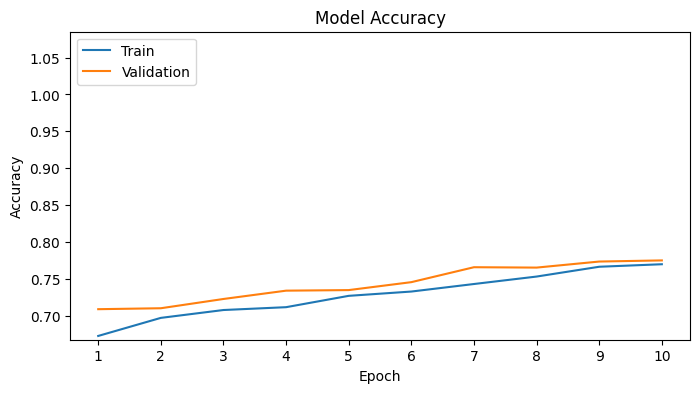

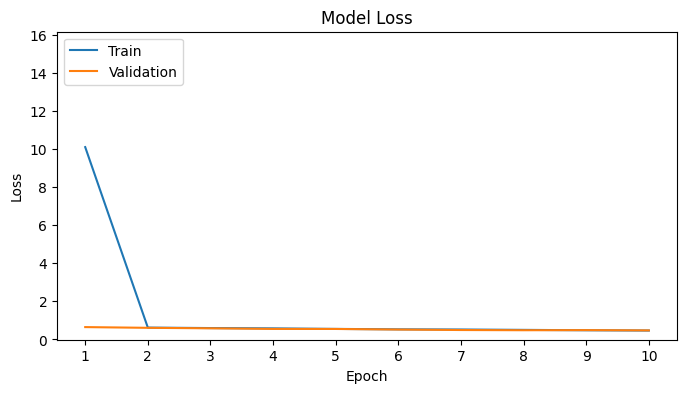

In [ ]:
# Evaluate the model on the validation data
validation_steps = tf.data.experimental.cardinality(val_ds).numpy()
validation_loss, validation_accuracy = model.evaluate(val_ds, steps=validation_steps)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Determine the number of epochs from the history data
num_epochs = len(history.history['accuracy'])
# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['accuracy'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_accuracy = max(max(history.history['accuracy']), max(history.history['val_accuracy']))
plt.ylim(top=max_accuracy * 1.4)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['loss'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.ylim(top=max_loss * 1.6)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()


227/227 [==============================] - 6s 26ms/step - loss: 0.4675 - accuracy: 0.7749
Test accuracy: 0.7749
Test loss: 0.4675
227/227 [==============================] - 6s 26ms/step


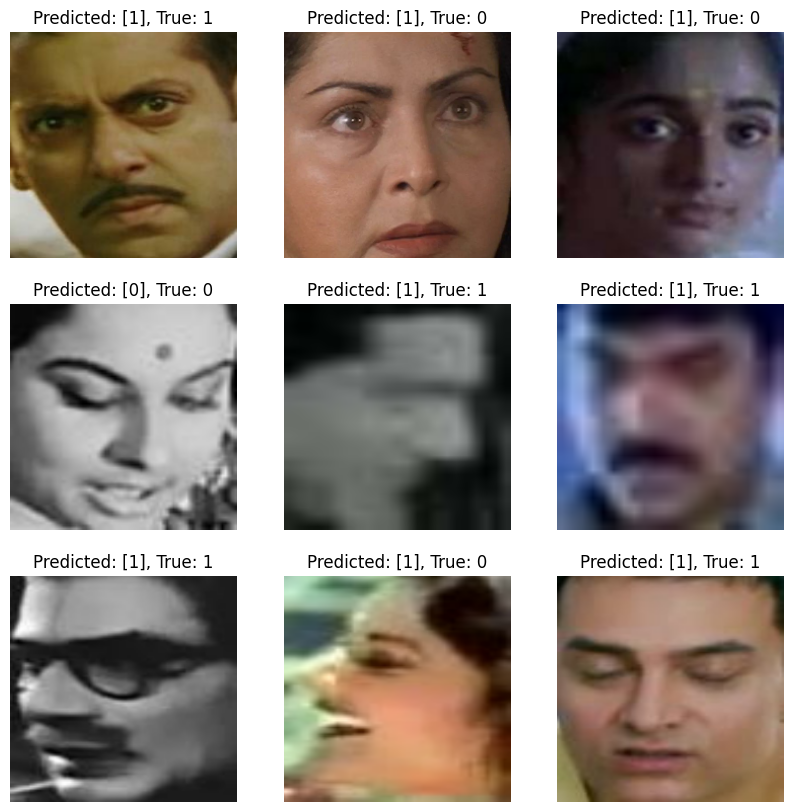

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_ds)

# threshold (commonly 0.5) to determine the class labels
binary_predictions = (predictions > 0.5).astype(int)

#  visualize the predictions along with the images and true labels,
for images, labels in test_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display the first 9 images from this batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {binary_predictions[i]}, True: {labels[i]}")
        plt.axis("off")


#MAKEUP

In [ ]:
os.mkdir("train/Makeup")
os.mkdir("test/Makeup")
os.mkdir("train/Makeup/PARTIAL")
os.mkdir("train/Makeup/OVER")
os.mkdir("test/Makeup/PARTIAL")
os.mkdir("test/Makeup/OVER")

In [ ]:
trainPath_makeup = "/content/train/Makeup"
testPath_makeup = "/content/test/Makeup"

In [ ]:

for i in range(X_train.shape[0]):
  location = X_train["imagepath"][i]
  makeup = X_train["Makeup "][i]
  name = Path(location).name
  if makeup  == "PARTIAL":
    dest = os.path.join("/content/train/Makeup/PARTIAL",name)
  else:
    dest = os.path.join("/content/train/Makeup/OVER",name)
  shutil.copy(location,dest)

for i in range(X_test.shape[0]):
  location = X_test["imagepath"][i]
  makeup = X_test["Makeup "][i]
  name = Path(location).name
  if makeup == "PARTIAL":
    dest = os.path.join("/content/test/Makeup/PARTIAL",name)
  else:
    dest = os.path.join("/content/test/Makeup/OVER",name)
  shutil.copy(location,dest)

In [ ]:
# load the Train images
train_makeup_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_makeup,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="training")

Found 13171 files belonging to 2 classes.
Using 9220 files for training.


In [ ]:
val_makeup_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_makeup,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="validation")

Found 13171 files belonging to 2 classes.
Using 3951 files for validation.


In [ ]:
# load the Test images
test_makeup_ds = tf.keras.utils.image_dataset_from_directory(
  testPath_makeup,
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)

Found 7288 files belonging to 2 classes.


In [ ]:
# CNN Model Structure
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_makeup_ds,
    epochs=20,
    validation_data=val_makeup_ds)  # number of iterations over the entire dataset


Epoch 1/20
289/289 [==============================] - 22s 68ms/step - loss: 1.3038 - accuracy: 0.9508 - val_loss: 0.1604 - val_accuracy: 0.9671
Epoch 2/20
289/289 [==============================] - 15s 51ms/step - loss: 0.1683 - accuracy: 0.9665 - val_loss: 0.3718 - val_accuracy: 0.9671
Epoch 3/20
289/289 [==============================] - 15s 51ms/step - loss: 0.1565 - accuracy: 0.9665 - val_loss: 0.1490 - val_accuracy: 0.9671
Epoch 4/20
289/289 [==============================] - 15s 52ms/step - loss: 0.1578 - accuracy: 0.9664 - val_loss: 0.1470 - val_accuracy: 0.9671
Epoch 5/20
289/289 [==============================] - 16s 54ms/step - loss: 0.1506 - accuracy: 0.9665 - val_loss: 0.1608 - val_accuracy: 0.9671
Epoch 6/20
289/289 [==============================] - 16s 54ms/step - loss: 0.3293 - accuracy: 0.9665 - val_loss: 0.1520 - val_accuracy: 0.9671
Epoch 7/20
289/289 [==============================] - 15s 50ms/step - loss: 0.1507 - accuracy: 0.9665 - val_loss: 0.1467 - val_accuracy:

In [ ]:


# Load the ResNet50 model, pre-trained on ImageNet data, without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_makeup_ds,
    epochs=20,
    validation_data=val_makeup_ds
)


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/20
289/289 [==============================] - 51s 151ms/step - loss: 0.1521 - accuracy: 0.9632 - val_loss: 0.1304 - val_accuracy: 0.9671
Epoch 2/20
289/289 [==============================] - 50s 173ms/step - loss: 0.1251 - accuracy: 0.9665 - val_loss: 0.1246 - val_accuracy: 0.9671
Epoch 3/20
289/289 [==============================] - 41s 142ms/step - loss: 0.1129 - accuracy: 0.9665 - val_loss: 0.1279 - val_accuracy: 0.9671
Epoch 4/20
289/289 [==============================] - 41s 143ms/step - loss: 0.1029 - accuracy: 0.9669 - val_loss: 0.1240 - val_accuracy: 0.9674
Epoch 5/20
289/289 [==============================] - 41s 142ms/step - loss: 0.0922 - accuracy: 0.9677 - val_loss: 0.1221 - val_accuracy: 0.9681
Epoch 6/20
289/289 [==============================] - 41s 142ms/step - loss: 0.0875 - accuracy: 0.9693 - val_loss: 0.1274 - val_accuracy: 0.9681
Epoch 7/20
289/289 [==============================] - 41s 142ms/s

124/124 [==============================] - 12s 98ms/step - loss: 0.2089 - accuracy: 0.9661
Validation Loss: 0.2088554948568344
Validation Accuracy: 0.9660845398902893


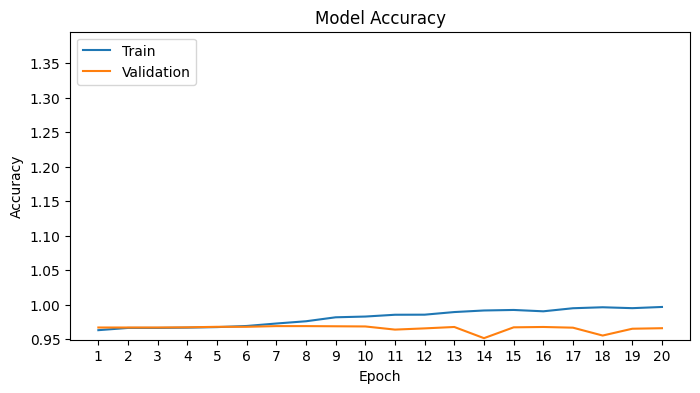

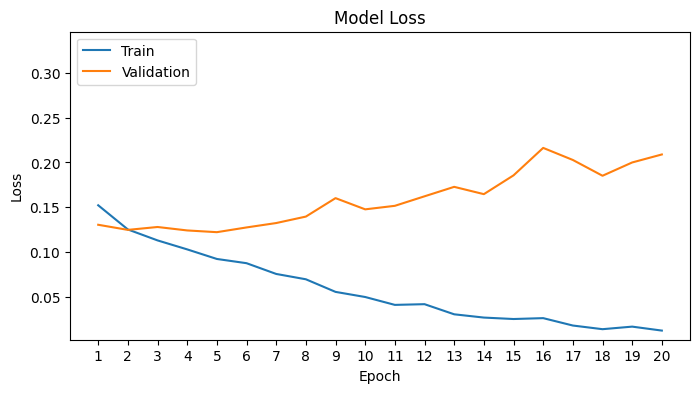

In [ ]:
# Evaluate the model on the validation data
validation_steps = tf.data.experimental.cardinality(val_makeup_ds).numpy()
validation_loss, validation_accuracy = model.evaluate(val_makeup_ds, steps=validation_steps)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Determine the number of epochs from the history data
num_epochs = len(history.history['accuracy'])

# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['accuracy'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_accuracy = max(max(history.history['accuracy']), max(history.history['val_accuracy']))
plt.ylim(top=max_accuracy * 1.4)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['loss'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.ylim(top=max_loss * 1.6)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()


228/228 [==============================] - 24s 103ms/step - loss: 0.1473 - accuracy: 0.9709
Test accuracy: 0.9709
Test loss: 0.1473
228/228 [==============================] - 24s 98ms/step


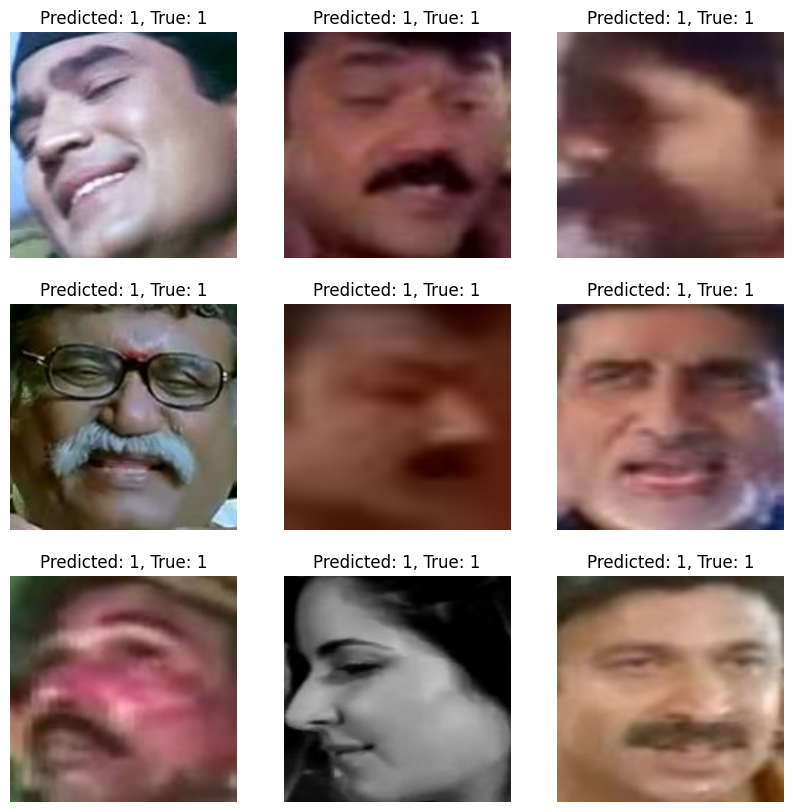

In [ ]:


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_makeup_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_makeup_ds)


# threshold (commonly 0.5) to determine the class labels
binary_predictions = (predictions > 0.5).astype(int)

#visualize the predictions along with the images and true labels
for images, labels in test_makeup_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display the first 9 images from this batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {binary_predictions[i][0]}, True: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()


#Illumination:

In [ ]:
print(df['Illumination '].unique())

['MEDIUM' 'BAD' 'HIGH']


In [ ]:
os.mkdir("train/ILLU")
os.mkdir("test/ILLU")
os.mkdir("train/ILLU/MEDIUM")
os.mkdir("train/ILLU/BAD")
os.mkdir("train/ILLU/HIGH")
os.mkdir("test/ILLU/MEDIUM")
os.mkdir("test/ILLU/HIGH")
os.mkdir("test/ILLU/BAD")

In [ ]:
for i in range(X_train.shape[0]):
  location = X_train["imagepath"][i]
  Illumination = X_train["Illumination "][i]
  name = Path(location).name
  if Illumination  == "MEDIUM":
    dest = os.path.join("/content/train/ILLU/MEDIUM",name)
  elif Illumination  == "BAD":
    dest = os.path.join("/content/train/ILLU/BAD",name)
  elif Illumination  == "HIGH":
    dest = os.path.join("/content/train/ILLU/HIGH",name)


  shutil.copy(location,dest)


for i in range(X_test.shape[0]):
  location = X_test["imagepath"][i]
  Illumination = X_test["Illumination "][i]
  name = Path(location).name
  if Illumination  == "MEDIUM":
    dest = os.path.join("/content/test/ILLU/MEDIUM",name)
  elif Illumination  == "BAD":
    dest = os.path.join("/content/test/ILLU/BAD",name)
  elif Illumination  == "HIGH":
    dest = os.path.join("/content/test/ILLU/HIGH",name)


  shutil.copy(location,dest)


In [ ]:
trainPath_ILLU = "/content/train/ILLU"
testPath_ILLU = "/content/test/ILLU"

In [ ]:
# load the Train images
train_illu_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_ILLU,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="training")


val_illu_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_ILLU,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="validation")


# load the Test images
test_illu_ds = tf.keras.utils.image_dataset_from_directory(
  testPath_ILLU,
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)

Found 14231 files belonging to 3 classes.
Using 9962 files for training.
Found 14231 files belonging to 3 classes.
Using 4269 files for validation.
Found 7615 files belonging to 3 classes.


In [ ]:
for image_batch, labels_batch in train_illu_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
num_classes_illu = len(df['Illumination '].unique())
print(num_classes_illu)

3


In [ ]:
# CNN Model Structure


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3) )

#Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])


# Train the model
history = model.fit(
    train_illu_ds,
    epochs=20,
    validation_data=val_illu_ds)




Epoch 1/20
312/312 [==============================] - 23s 65ms/step - loss: 3.1864 - accuracy: 0.6481 - val_loss: 0.7991 - val_accuracy: 0.6566
Epoch 2/20
312/312 [==============================] - 16s 50ms/step - loss: 0.7661 - accuracy: 0.6613 - val_loss: 0.7897 - val_accuracy: 0.6524
Epoch 3/20
312/312 [==============================] - 16s 50ms/step - loss: 0.7187 - accuracy: 0.6684 - val_loss: 1.0012 - val_accuracy: 0.5842
Epoch 4/20
312/312 [==============================] - 18s 58ms/step - loss: 0.7485 - accuracy: 0.6651 - val_loss: 0.8020 - val_accuracy: 0.6421
Epoch 5/20
312/312 [==============================] - 17s 54ms/step - loss: 0.6807 - accuracy: 0.6764 - val_loss: 0.8591 - val_accuracy: 0.6306
Epoch 6/20
312/312 [==============================] - 16s 50ms/step - loss: 0.6355 - accuracy: 0.6936 - val_loss: 1.0366 - val_accuracy: 0.5882
Epoch 7/20
312/312 [==============================] - 17s 54ms/step - loss: 0.5652 - accuracy: 0.7303 - val_loss: 1.0858 - val_accuracy:

In [ ]:
# Model Architecture with Batch Normalization and Spatial Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.5))  # Spatial Dropout
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(3))

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(
    train_illu_ds,
    epochs=20,
    validation_data=val_illu_ds,
    callbacks=[early_stopping, reduce_lr]  # Include both callbacks
)


Epoch 1/20
312/312 [==============================] - 39s 113ms/step - loss: 0.9728 - accuracy: 0.6575 - val_loss: 0.9358 - val_accuracy: 0.6784 - lr: 0.0100
Epoch 2/20
312/312 [==============================] - 37s 120ms/step - loss: 0.8638 - accuracy: 0.6923 - val_loss: 0.9043 - val_accuracy: 0.6685 - lr: 0.0100
Epoch 3/20
312/312 [==============================] - 35s 113ms/step - loss: 0.8255 - accuracy: 0.7008 - val_loss: 0.8663 - val_accuracy: 0.6908 - lr: 0.0100
Epoch 4/20
312/312 [==============================] - 37s 117ms/step - loss: 0.8041 - accuracy: 0.6999 - val_loss: 0.8581 - val_accuracy: 0.6924 - lr: 0.0100
Epoch 5/20
312/312 [==============================] - 35s 112ms/step - loss: 0.7689 - accuracy: 0.7120 - val_loss: 0.8464 - val_accuracy: 0.6931 - lr: 0.0100
Epoch 6/20
312/312 [==============================] - 36s 115ms/step - loss: 0.7376 - accuracy: 0.7222 - val_loss: 0.8493 - val_accuracy: 0.6903 - lr: 0.0100
Epoch 7/20
312/312 [==============================] 

In [ ]:
# Load the ResNet50 model, pre-trained on ImageNet data, without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes_illu, activation='softmax')
])

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.001)

# Train the model
history = model.fit(
    train_illu_ds,
    epochs=20,
    validation_data=val_illu_ds,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
312/312 [==============================] - 57s 171ms/step - loss: 1.5017 - accuracy: 0.6605 - val_loss: 1.4052 - val_accuracy: 0.7058 - lr: 0.0100
Epoch 2/20
312/312 [==============================] - 45s 144ms/step - loss: 1.3496 - accuracy: 0.7107 - val_loss: 1.3372 - val_accuracy: 0.7138 - lr: 0.0100
Epoch 3/20
312/312 [==============================] - 52s 167ms/step - loss: 1.2210 - accuracy: 0.7384 - val_loss: 1.3291 - val_accuracy: 0.6531 - lr: 0.0100
Epoch 4/20
312/312 [==============================] - 45s 144ms/step - loss: 1.1240 - accuracy: 0.7595 - val_loss: 1.2145 - val_accuracy: 0.7114 - lr: 0.0100
Epoch 5/20
312/312 [==============================] - 45s 142ms/step - loss: 1.0139 - accuracy: 0.7892 - val_loss: 1.1953 - val_accuracy: 0.7130 - lr: 0.0100
Epoch 6/20
312/312 [==============================] - 52s 167ms/step - loss: 0.9295 - accuracy: 0.8032 - val_loss: 1.2356 - val_accuracy: 0.6784 - lr: 0.0100
Epoch 7/20
312/312 [==============================] 

134/134 [==============================] - 14s 100ms/step - loss: 1.2178 - accuracy: 0.6945
Validation Loss: 1.2177900075912476
Validation Accuracy: 0.6945420503616333


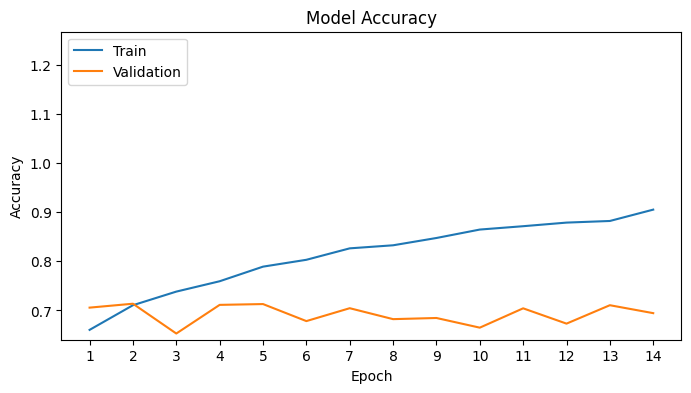

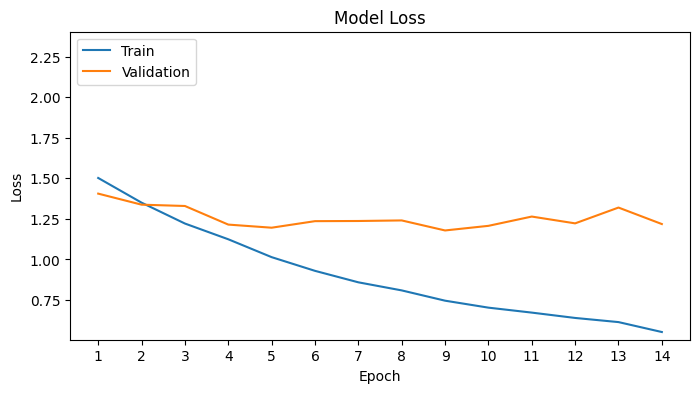

In [ ]:
# Evaluate the model on the validation data
validation_steps = tf.data.experimental.cardinality(val_illu_ds).numpy()
validation_loss, validation_accuracy = model.evaluate(val_illu_ds, steps=validation_steps)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Determine the number of epochs from the history data
num_epochs = len(history.history['accuracy'])

# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['accuracy'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_accuracy = max(max(history.history['accuracy']), max(history.history['val_accuracy']))
plt.ylim(top=max_accuracy * 1.4)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['loss'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.ylim(top=max_loss * 1.6)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()


238/238 [==============================] - 26s 106ms/step - loss: 1.1699 - accuracy: 0.7014
Test accuracy: 0.7014
Test loss: 1.1699
238/238 [==============================] - 25s 98ms/step


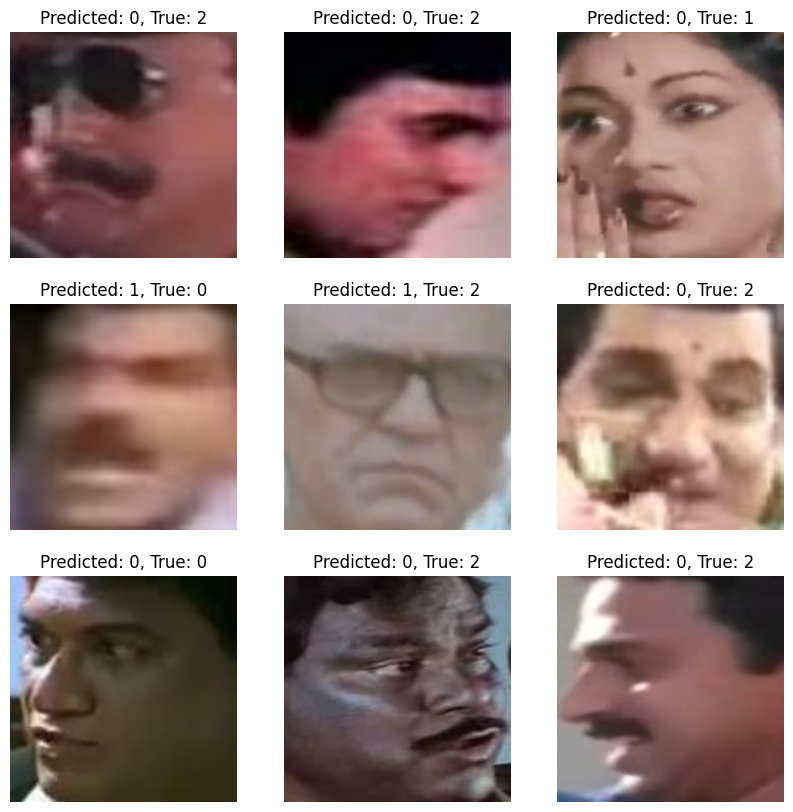

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_illu_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_illu_ds)


# threshold (commonly 0.5) to determine the class labels
binary_predictions = (predictions > 0.5).astype(int)

# visualize the predictions along with the images and true labels
for images, labels in test_illu_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display the first 9 images from this batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {binary_predictions[i][0]}, True: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

#AGE:

In [ ]:
print(df['Age '].unique())

['YOUNG' 'OLD' 'MIDDLE' 'CHILD']


In [ ]:
os.mkdir("train/AGE")
os.mkdir("test/AGE")

os.mkdir("train/AGE/YOUNG")
os.mkdir("train/AGE/OLD")
os.mkdir("train/AGE/MIDDLE")
os.mkdir("train/AGE/CHILD")

os.mkdir("test/AGE/YOUNG")
os.mkdir("test/AGE/OLD")
os.mkdir("test/AGE/MIDDLE")
os.mkdir("test/AGE/CHILD")

In [ ]:
for i in range(X_train.shape[0]):
  location = X_train["imagepath"][i]
  age = X_train["Age "][i]
  name = Path(location).name
  if age  == "YOUNG":
    dest = os.path.join("/content/train/AGE/YOUNG",name)
  elif age  == "OLD":
    dest = os.path.join("/content/train/AGE/OLD",name)
  elif age  == "MIDDLE":
    dest = os.path.join("/content/train/AGE/MIDDLE",name)
  elif age  == "CHILD":
    dest = os.path.join("/content/train/AGE/CHILD",name)


  shutil.copy(location,dest)


for i in range(X_test.shape[0]):
  location = X_test["imagepath"][i]
  age = X_test["Age "][i]
  name = Path(location).name
  if age  == "YOUNG":
    dest = os.path.join("/content/test/AGE/YOUNG",name)
  elif age  == "OLD":
    dest = os.path.join("/content/test/AGE/OLD",name)
  elif age  == "MIDDLE":
    dest = os.path.join("/content/test/AGE/MIDDLE",name)
  elif age  == "CHILD":
    dest = os.path.join("/content/test/AGE/CHILD",name)


  shutil.copy(location,dest)


In [ ]:
trainPath_AGE = "/content/train/AGE"
testPath_AGE = "/content/test/AGE"

In [ ]:
# load the Train images
train_age_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_AGE,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="training")


val_age_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_AGE,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="validation")


# load the Test images
test_age_ds = tf.keras.utils.image_dataset_from_directory(
  testPath_AGE,
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)

Found 13786 files belonging to 4 classes.
Using 9651 files for training.
Found 13786 files belonging to 4 classes.
Using 4135 files for validation.
Found 7515 files belonging to 4 classes.


In [ ]:
for image_batch, labels_batch in train_age_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
num_classes_age = len(df['Age '].unique())
print(num_classes_age)

4


In [ ]:
# CNN Model Structure
batch_size = 32
IMG_SIZE = (224, 224)
num_classes_age = len(df['Age '].unique())
print(num_classes_age)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes_age) )

#Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_age_ds,
    epochs=20,
    validation_data=val_age_ds)


model.save('age.keras')

netron.start('age.keras', 8081)




4
Epoch 1/20
302/302 [==============================] - 27s 53ms/step - loss: 3.4971 - accuracy: 0.5448 - val_loss: 0.9190 - val_accuracy: 0.5652
Epoch 2/20
302/302 [==============================] - 16s 51ms/step - loss: 0.8364 - accuracy: 0.6344 - val_loss: 0.9791 - val_accuracy: 0.5657
Epoch 3/20
302/302 [==============================] - 15s 50ms/step - loss: 0.7235 - accuracy: 0.6888 - val_loss: 0.9906 - val_accuracy: 0.5579
Epoch 4/20
302/302 [==============================] - 15s 50ms/step - loss: 0.5752 - accuracy: 0.7546 - val_loss: 1.0933 - val_accuracy: 0.5918
Epoch 5/20
302/302 [==============================] - 15s 49ms/step - loss: 0.4495 - accuracy: 0.8151 - val_loss: 1.3617 - val_accuracy: 0.5843
Epoch 6/20
302/302 [==============================] - 17s 54ms/step - loss: 0.3661 - accuracy: 0.8562 - val_loss: 1.5552 - val_accuracy: 0.5814
Epoch 7/20
302/302 [==============================] - 17s 57ms/step - loss: 0.3042 - accuracy: 0.8855 - val_loss: 1.7103 - val_accurac

('localhost', 8081)

In [ ]:

# Model Architecture with Batch Normalization and Spatial Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.5))  # Spatial Dropout
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(num_classes_age))

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(
    train_age_ds,
    epochs=20,
    validation_data=val_age_ds,
    callbacks=[early_stopping, reduce_lr]  # Include both callbacks
)
model.save('age_batch_noem.keras')

netron.start('age_batch_noem.keras', 8081)

Epoch 1/20
302/302 [==============================] - 37s 113ms/step - loss: 1.1556 - accuracy: 0.5625 - val_loss: 1.0347 - val_accuracy: 0.6179 - lr: 0.0100
Epoch 2/20
302/302 [==============================] - 36s 117ms/step - loss: 1.0076 - accuracy: 0.6176 - val_loss: 1.0757 - val_accuracy: 0.6053 - lr: 0.0100
Epoch 3/20
302/302 [==============================] - 33s 110ms/step - loss: 0.9558 - accuracy: 0.6453 - val_loss: 1.0168 - val_accuracy: 0.6148 - lr: 0.0100
Epoch 4/20
302/302 [==============================] - 34s 113ms/step - loss: 0.9063 - accuracy: 0.6556 - val_loss: 0.9179 - val_accuracy: 0.6522 - lr: 0.0100
Epoch 5/20
302/302 [==============================] - 34s 112ms/step - loss: 0.8683 - accuracy: 0.6781 - val_loss: 0.8928 - val_accuracy: 0.6721 - lr: 0.0100
Epoch 6/20
302/302 [==============================] - 36s 118ms/step - loss: 0.8375 - accuracy: 0.6914 - val_loss: 0.9096 - val_accuracy: 0.6600 - lr: 0.0100
Epoch 7/20
302/302 [==============================] 

('localhost', 8081)

In [ ]:
# Load the ResNet50 model, pre-trained on ImageNet data, without the top layer
batch_size = 32
IMG_SIZE = (224, 224)
num_classes_age = len(df['Age '].unique())
print(num_classes_age)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes_age, activation='softmax')
])

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.001)

# Train the model
history = model.fit(
    train_age_ds,
    epochs=20,
    validation_data=val_age_ds,
    callbacks=[early_stopping, reduce_lr]
)
#model.save('age_transfer.keras')

#netron.start('age_transfer.keras', 8081)

4
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/20
302/302 [==============================] - 50s 151ms/step - loss: 1.4362 - accuracy: 0.6014 - val_loss: 1.3460 - val_accuracy: 0.6713 - lr: 0.0100
Epoch 2/20
302/302 [==============================] - 51s 169ms/step - loss: 1.2697 - accuracy: 0.6958 - val_loss: 1.2294 - val_accuracy: 0.7154 - lr: 0.0100
Epoch 3/20
302/302 [==============================] - 43s 143ms/step - loss: 1.1192 - accuracy: 0.7469 - val_loss: 1.1352 - val_accuracy: 0.7340 - lr: 0.0100
Epoch 4/20
302/302 [==============================] - 43s 142ms/step - loss: 1.0061 - accuracy: 0.7782 - val_loss: 1.0709 - val_accuracy: 0.7453 - lr: 0.0100
Epoch 5/20
302/302 [==============================] - 43s 143ms/step - loss: 0.8921 - accuracy: 0.8139 - val_loss: 1.1017 - val_accuracy: 0.7255 - lr: 0.0100
Epoch 6/20
302/302 [==============================] - 51s 169ms/step - loss: 0.8128 - accuracy: 0.8445 - val_loss: 1.2141 - val_accuracy: 0.703

130/130 [==============================] - 13s 97ms/step - loss: 1.0793 - accuracy: 0.7630
Validation Loss: 1.079262375831604
Validation Accuracy: 0.7629988193511963


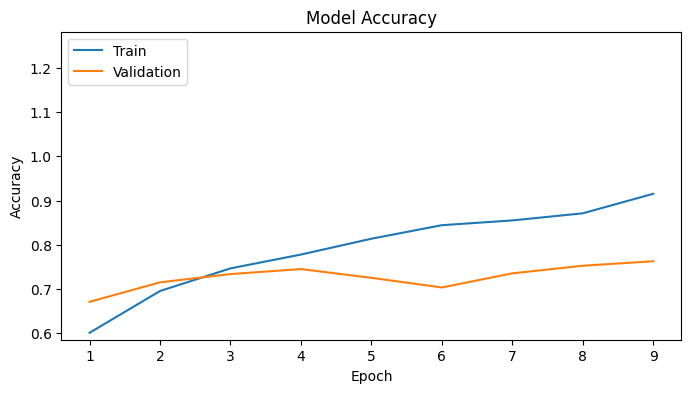

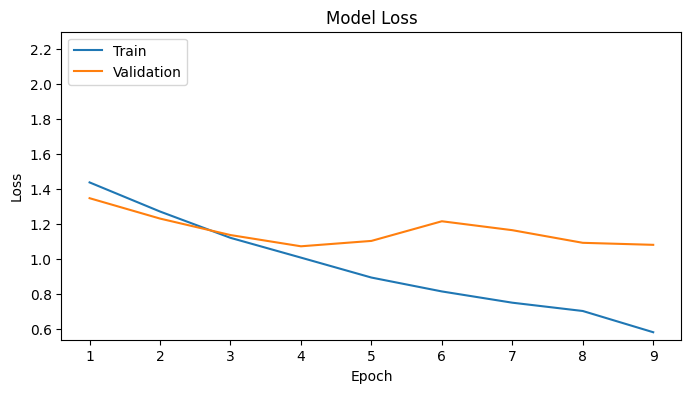

In [ ]:
# Evaluate the model on the validation data
validation_steps = tf.data.experimental.cardinality(val_age_ds).numpy()
validation_loss, validation_accuracy = model.evaluate(val_age_ds, steps=validation_steps)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Determine the number of epochs from the history data
num_epochs = len(history.history['accuracy'])

# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['accuracy'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_accuracy = max(max(history.history['accuracy']), max(history.history['val_accuracy']))
plt.ylim(top=max_accuracy * 1.4)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['loss'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.ylim(top=max_loss * 1.6)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()




235/235 [==============================] - 24s 103ms/step - loss: 1.0644 - accuracy: 0.7609
Test accuracy: 0.7609
Test loss: 1.0644
235/235 [==============================] - 23s 98ms/step


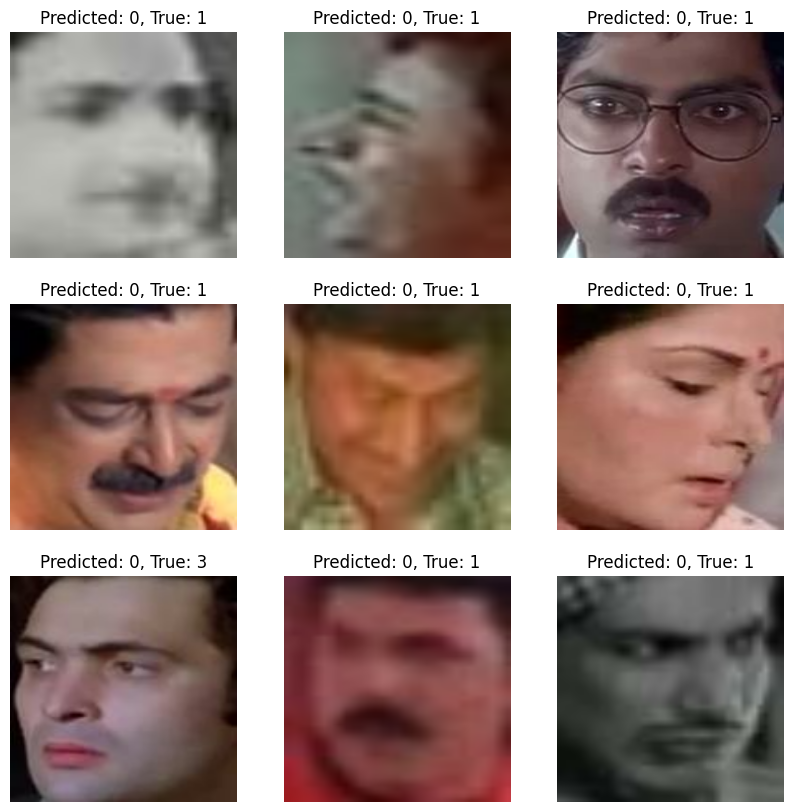

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_age_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_age_ds)


# threshold (commonly 0.5) to determine the class labels
binary_predictions = (predictions > 0.5).astype(int)

#visualize the predictions
for images, labels in test_age_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display the first 9 images from this batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {binary_predictions[i][0]}, True: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

#Occlusion:

In [ ]:
print(df['Occlusion '].unique())

['NONE' 'HAND' 'OTHERS' 'BEARD' 'GLASSES' 'HAIR' 'ORNAMENTS']


In [ ]:
os.mkdir("train/OCCLUSION")
os.mkdir("test/OCCLUSION")

os.mkdir("train/OCCLUSION/NONE")
os.mkdir("train/OCCLUSION/HAND")
os.mkdir("train/OCCLUSION/OTHERS")
os.mkdir("train/OCCLUSION/BEARD")
os.mkdir("train/OCCLUSION/GLASSES")
os.mkdir("train/OCCLUSION/HAIR")
os.mkdir("train/OCCLUSION/ORNAMENTS")

os.mkdir("test/OCCLUSION/NONE")
os.mkdir("test/OCCLUSION/HAND")
os.mkdir("test/OCCLUSION/OTHERS")
os.mkdir("test/OCCLUSION/BEARD")
os.mkdir("test/OCCLUSION/GLASSES")
os.mkdir("test/OCCLUSION/HAIR")
os.mkdir("test/OCCLUSION/ORNAMENTS")


In [ ]:
for i in range(X_train.shape[0]):
  location = X_train["imagepath"][i]
  occlusion = X_train["Occlusion "][i]
  name = Path(location).name
  if occlusion  == "NONE":
    dest = os.path.join("/content/train/OCCLUSION/NONE",name)
  elif occlusion  == "HAND":
    dest = os.path.join("/content/train/OCCLUSION/HAND",name)
  elif occlusion  == "OTHERS":
    dest = os.path.join("/content/train/OCCLUSION/OTHERS",name)
  elif occlusion  == "BEARD":
    dest = os.path.join("/content/train/OCCLUSION/BEARD",name)
  elif occlusion  == "GLASSES":
    dest = os.path.join("/content/train/OCCLUSION/GLASSES",name)
  elif occlusion  == "HAIR":
    dest = os.path.join("/content/train/OCCLUSION/HAIR",name)
  elif occlusion  == "ORNAMENTS":
    dest = os.path.join("/content/train/OCCLUSION/ORNAMENTS",name)


  shutil.copy(location,dest)


for i in range(X_test.shape[0]):
  location = X_test["imagepath"][i]
  occlusion = X_test["Occlusion "][i]
  name = Path(location).name
  if occlusion  == "NONE":
    dest = os.path.join("/content/test/OCCLUSION/NONE",name)
  elif occlusion  == "HAND":
    dest = os.path.join("/content/test/OCCLUSION/HAND",name)
  elif occlusion  == "OTHERS":
    dest = os.path.join("/content/test/OCCLUSION/OTHERS",name)
  elif occlusion  == "BEARD":
    dest = os.path.join("/content/test/OCCLUSION/BEARD",name)
  elif occlusion  == "GLASSES":
    dest = os.path.join("/content/test/OCCLUSION/GLASSES",name)
  elif occlusion  == "HAIR":
    dest = os.path.join("/content/test/OCCLUSION/HAIR",name)
  elif occlusion  == "ORNAMENTS":
    dest = os.path.join("/content/test/OCCLUSION/ORNAMENTS",name)


  shutil.copy(location,dest)


In [ ]:
trainPath_OCCLU = "/content/train/OCCLUSION"
testPath_OCCLU = "/content/test/OCCLUSION"

In [ ]:
# load the Train images
train_occlu_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_OCCLU,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="training")


val_occlu_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_OCCLU,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="validation")


# load the Test images
test_occlu_ds = tf.keras.utils.image_dataset_from_directory(
  testPath_OCCLU,
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)

Found 14443 files belonging to 7 classes.
Using 10111 files for training.
Found 14443 files belonging to 7 classes.
Using 4332 files for validation.
Found 7708 files belonging to 7 classes.


In [ ]:
for image_batch, labels_batch in train_occlu_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
num_classes_occlu = len(df['Occlusion '].unique())
print(num_classes_occlu)

7


In [ ]:
# CNN Model Structure

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes_occlu) )

#Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])


# Train the model
history = model.fit(
    train_occlu_ds,
    epochs=20,
    validation_data=val_occlu_ds)




Epoch 1/20
316/316 [==============================] - 24s 65ms/step - loss: 3.4154 - accuracy: 0.6696 - val_loss: 1.1221 - val_accuracy: 0.6900
Epoch 2/20
316/316 [==============================] - 18s 55ms/step - loss: 1.0730 - accuracy: 0.7010 - val_loss: 1.1056 - val_accuracy: 0.6999
Epoch 3/20
316/316 [==============================] - 16s 50ms/step - loss: 0.9688 - accuracy: 0.7227 - val_loss: 1.0556 - val_accuracy: 0.7084
Epoch 4/20
316/316 [==============================] - 16s 49ms/step - loss: 0.8383 - accuracy: 0.7516 - val_loss: 1.0906 - val_accuracy: 0.7011
Epoch 5/20
316/316 [==============================] - 16s 49ms/step - loss: 0.7432 - accuracy: 0.7757 - val_loss: 1.1262 - val_accuracy: 0.6923
Epoch 6/20
316/316 [==============================] - 16s 49ms/step - loss: 0.6481 - accuracy: 0.7998 - val_loss: 1.2247 - val_accuracy: 0.7020
Epoch 7/20
316/316 [==============================] - 16s 51ms/step - loss: 0.5480 - accuracy: 0.8243 - val_loss: 1.4944 - val_accuracy:

In [ ]:
# Model Architecture with Batch Normalization and Spatial Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.5))  # Spatial Dropout
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(num_classes_occlu))

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.001)

# Train the model
history = model.fit(
    train_occlu_ds,
    epochs=20,
    validation_data=val_occlu_ds,
    callbacks=[early_stopping, reduce_lr]  # Include both callbacks
)


Epoch 1/20
316/316 [==============================] - 40s 116ms/step - loss: 1.2965 - accuracy: 0.6624 - val_loss: 1.1350 - val_accuracy: 0.7059 - lr: 0.0100
Epoch 2/20
316/316 [==============================] - 36s 113ms/step - loss: 1.1175 - accuracy: 0.7064 - val_loss: 1.0789 - val_accuracy: 0.7179 - lr: 0.0100
Epoch 3/20
316/316 [==============================] - 37s 116ms/step - loss: 1.0536 - accuracy: 0.7196 - val_loss: 1.0645 - val_accuracy: 0.7202 - lr: 0.0100
Epoch 4/20
316/316 [==============================] - 36s 113ms/step - loss: 1.0014 - accuracy: 0.7286 - val_loss: 1.0375 - val_accuracy: 0.7235 - lr: 0.0100
Epoch 5/20
316/316 [==============================] - 36s 114ms/step - loss: 0.9369 - accuracy: 0.7452 - val_loss: 1.0353 - val_accuracy: 0.7274 - lr: 0.0100
Epoch 6/20
316/316 [==============================] - 36s 114ms/step - loss: 0.8820 - accuracy: 0.7587 - val_loss: 1.1633 - val_accuracy: 0.6810 - lr: 0.0100
Epoch 7/20
316/316 [==============================] 

In [ ]:
# Load the ResNet50 model, pre-trained on ImageNet data, without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes_occlu, activation='softmax')
])

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.001)

# Train the model
history = model.fit(
    train_occlu_ds,
    epochs=20,
    validation_data=val_occlu_ds,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
316/316 [==============================] - 52s 148ms/step - loss: 1.3405 - accuracy: 0.6935 - val_loss: 1.0986 - val_accuracy: 0.7562 - lr: 0.0100
Epoch 2/20
316/316 [==============================] - 45s 143ms/step - loss: 1.1017 - accuracy: 0.7538 - val_loss: 1.0589 - val_accuracy: 0.7770 - lr: 0.0100
Epoch 3/20
316/316 [==============================] - 53s 167ms/step - loss: 1.0123 - accuracy: 0.7768 - val_loss: 1.0083 - val_accuracy: 0.7805 - lr: 0.0100
Epoch 4/20
316/316 [==============================] - 53s 167ms/step - loss: 0.8953 - accuracy: 0.8023 - val_loss: 0.9658 - val_accuracy: 0.7941 - lr: 0.0100
Epoch 5/20
316/316 [==============================] - 45s 143ms/step - loss: 0.8826 - accuracy: 0.8218 - val_loss: 1.0846 - val_accuracy: 0.7925 - lr: 0.0100
Epoch 6/20
316/316 [==============================] - 53s 167ms/step - loss: 0.8202 - accuracy: 0.8474 - val_loss: 1.1339 - val_accuracy: 0.7911 - lr: 0.0100
Epoch 7/20
316/316 [==============================] 

136/136 [==============================] - 14s 100ms/step - loss: 1.2003 - accuracy: 0.7922
Validation Loss: 1.2003062963485718
Validation Accuracy: 0.7922437787055969


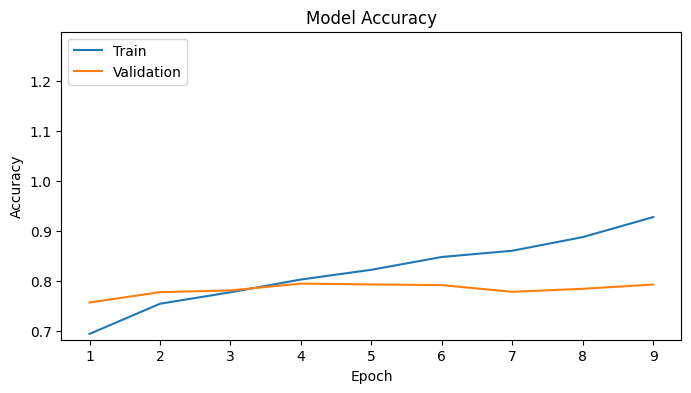

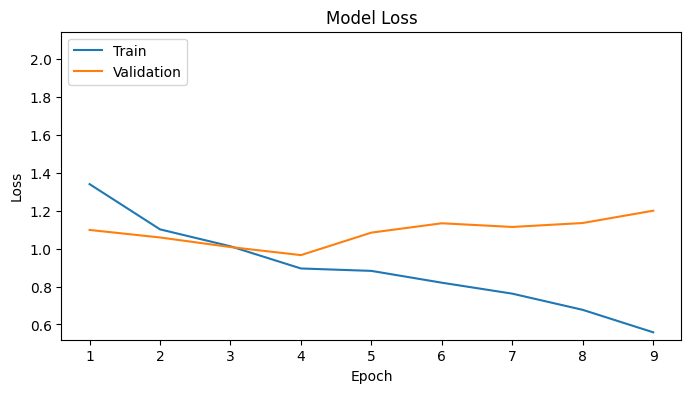

In [ ]:
# Evaluate the model on the validation data
validation_steps = tf.data.experimental.cardinality(val_occlu_ds).numpy()
validation_loss, validation_accuracy = model.evaluate(val_occlu_ds, steps=validation_steps)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Determine the number of epochs from the history data
num_epochs = len(history.history['accuracy'])

# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['accuracy'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_accuracy = max(max(history.history['accuracy']), max(history.history['val_accuracy']))
plt.ylim(top=max_accuracy * 1.4)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['loss'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.ylim(top=max_loss * 1.6)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()


241/241 [==============================] - 25s 104ms/step - loss: 1.1957 - accuracy: 0.7999
Test accuracy: 0.7999
Test loss: 1.1957
241/241 [==============================] - 25s 98ms/step


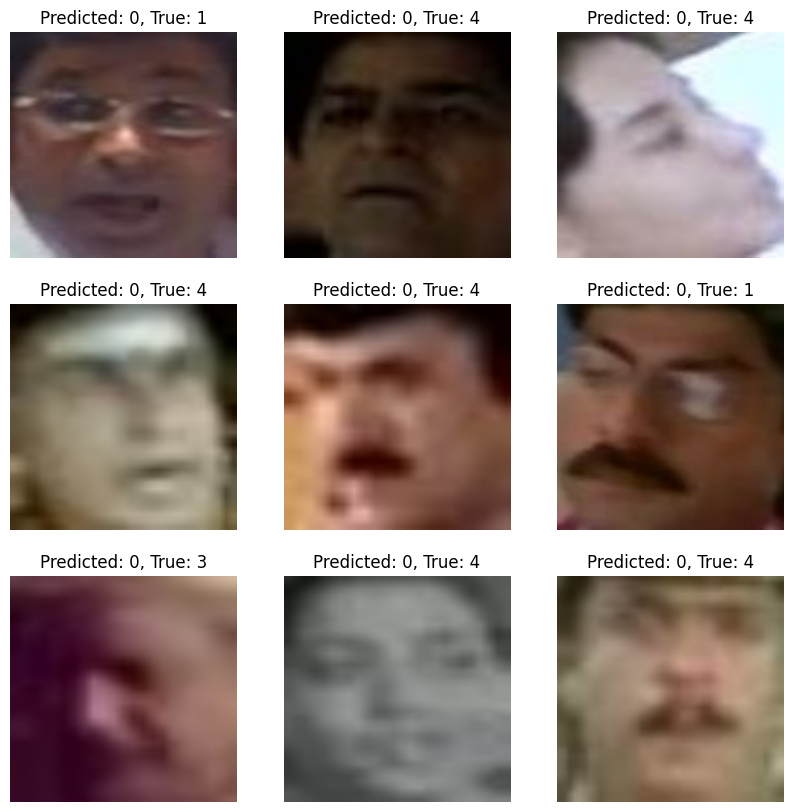

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_occlu_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_occlu_ds)

# threshold (commonly 0.5) to determine the class labels
binary_predictions = (predictions > 0.5).astype(int)

# visualize the predictions along with the images and true labels
for images, labels in test_occlu_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display the first 9 images from this batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {binary_predictions[i][0]}, True: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

#Pose:

In [ ]:
print(df['Pose '].unique())

['UP' 'FRONTAL' 'LEFT' 'DOWN' 'RIGHT']


In [ ]:
os.mkdir("train/POSE")
os.mkdir("test/POSE")

os.mkdir("train/POSE/UP")
os.mkdir("train/POSE/FRONTAL")
os.mkdir("train/POSE/LEFT")
os.mkdir("train/POSE/DOWN")
os.mkdir("train/POSE/RIGHT")

os.mkdir("test/POSE/UP")
os.mkdir("test/POSE/FRONTAL")
os.mkdir("test/POSE/LEFT")
os.mkdir("test/POSE/DOWN")
os.mkdir("test/POSE/RIGHT")


In [ ]:
for i in range(X_train.shape[0]):
  location = X_train["imagepath"][i]
  pose = X_train["Pose "][i]
  name = Path(location).name
  if pose  == "UP":
    dest = os.path.join("/content/train/POSE/UP",name)
  elif pose  == "FRONTAL":
    dest = os.path.join("/content/train/POSE/FRONTAL",name)
  elif pose  == "LEFT":
    dest = os.path.join("/content/train/POSE/LEFT",name)
  elif pose  == "DOWN":
    dest = os.path.join("/content/train/POSE/DOWN",name)
  elif pose  == "RIGHT":
    dest = os.path.join("/content/train/POSE/RIGHT",name)


  shutil.copy(location,dest)


for i in range(X_test.shape[0]):
  location = X_test["imagepath"][i]
  pose = X_test["Pose "][i]
  name = Path(location).name
  if pose  == "UP":
    dest = os.path.join("/content/test/POSE/UP",name)
  elif pose  == "FRONTAL":
    dest = os.path.join("/content/test/POSE/FRONTAL",name)
  elif pose  == "LEFT":
    dest = os.path.join("/content/test/POSE/LEFT",name)
  elif pose  == "DOWN":
    dest = os.path.join("/content/test/POSE/DOWN",name)
  elif pose  == "RIGHT":
    dest = os.path.join("/content/test/POSE/RIGHT",name)


  shutil.copy(location,dest)


In [ ]:
trainPath_POSE = "/content/train/POSE"
testPath_POSE = "/content/test/POSE"

In [ ]:
# load the Train images
train_pose_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_POSE,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="training")


val_pose_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_POSE,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="validation")


# load the Test images
test_pose_ds = tf.keras.utils.image_dataset_from_directory(
  testPath_POSE,
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)

Found 15385 files belonging to 5 classes.
Using 10770 files for training.
Found 15385 files belonging to 5 classes.
Using 4615 files for validation.
Found 7974 files belonging to 5 classes.


In [ ]:
for image_batch, labels_batch in train_pose_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
num_classes_pose = len(df['Pose '].unique())
print(num_classes_pose)

5


In [ ]:
# CNN Model Structure

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes_pose) )

#Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])


# Train the model
history = model.fit(
    train_pose_ds,
    epochs=20,
    validation_data=val_pose_ds)



Epoch 1/20
337/337 [==============================] - 19s 53ms/step - loss: 3.4697 - accuracy: 0.6305 - val_loss: 0.9534 - val_accuracy: 0.6698
Epoch 2/20
337/337 [==============================] - 17s 50ms/step - loss: 0.8768 - accuracy: 0.6913 - val_loss: 0.9143 - val_accuracy: 0.6949
Epoch 3/20
337/337 [==============================] - 19s 55ms/step - loss: 0.7565 - accuracy: 0.7258 - val_loss: 0.9882 - val_accuracy: 0.6715
Epoch 4/20
337/337 [==============================] - 17s 49ms/step - loss: 0.6324 - accuracy: 0.7697 - val_loss: 1.0904 - val_accuracy: 0.6802
Epoch 5/20
337/337 [==============================] - 17s 49ms/step - loss: 0.5428 - accuracy: 0.8026 - val_loss: 1.1888 - val_accuracy: 0.6711
Epoch 6/20
337/337 [==============================] - 18s 52ms/step - loss: 0.4478 - accuracy: 0.8343 - val_loss: 1.5888 - val_accuracy: 0.6758
Epoch 7/20
337/337 [==============================] - 17s 51ms/step - loss: 0.3852 - accuracy: 0.8591 - val_loss: 1.7962 - val_accuracy:

In [ ]:
# Model Architecture with Batch Normalization and Spatial Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.5))  # Spatial Dropout
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(num_classes_pose))

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.001)

# Train the model
history = model.fit(
    train_pose_ds,
    epochs=20,
    validation_data=val_pose_ds,
    callbacks=[early_stopping, reduce_lr]  # Include both callbacks
)


Epoch 1/20
337/337 [==============================] - 42s 116ms/step - loss: 1.2347 - accuracy: 0.6153 - val_loss: 1.0664 - val_accuracy: 0.6795 - lr: 0.0100
Epoch 2/20
337/337 [==============================] - 38s 113ms/step - loss: 1.0426 - accuracy: 0.6823 - val_loss: 1.0165 - val_accuracy: 0.6871 - lr: 0.0100
Epoch 3/20
337/337 [==============================] - 39s 116ms/step - loss: 0.9616 - accuracy: 0.7032 - val_loss: 0.9911 - val_accuracy: 0.6917 - lr: 0.0100
Epoch 4/20
337/337 [==============================] - 39s 116ms/step - loss: 0.8992 - accuracy: 0.7231 - val_loss: 1.0126 - val_accuracy: 0.6927 - lr: 0.0100
Epoch 5/20
337/337 [==============================] - 39s 115ms/step - loss: 0.8407 - accuracy: 0.7383 - val_loss: 1.0013 - val_accuracy: 0.6990 - lr: 0.0100
Epoch 6/20
337/337 [==============================] - 39s 115ms/step - loss: 0.7874 - accuracy: 0.7599 - val_loss: 1.0362 - val_accuracy: 0.6938 - lr: 0.0100
Epoch 7/20
337/337 [==============================] 

In [ ]:
#transfer learning

# Load the VGG16 model, pre-trained on ImageNet data, without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes_pose, activation='softmax')
])

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=2, min_lr=0.001)

# Train the model
history = model.fit(
    train_pose_ds,
    epochs=20,
    validation_data=val_pose_ds,
    callbacks=[early_stopping, reduce_lr]
)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
337/337 [==============================] - 69s 193ms/step - loss: 2.8815 - accuracy: 0.6652 - val_loss: 3.2438 - val_accuracy: 0.7233 - lr: 0.0100
Epoch 2/20
337/337 [==============================] - 64s 189ms/step - loss: 3.0876 - accuracy: 0.7214 - val_loss: 2.9478 - val_accuracy: 0.7259 - lr: 0.0100
Epoch 3/20
337/337 [==============================] - 64s 190ms/step - loss: 2.7923 - accuracy: 0.7500 - val_loss: 2.7586 - val_accuracy: 0.7283 - lr: 0.0100
Epoch 4/20
337/337 [==============================] - 62s 182ms/step - loss: 2.5124 - accuracy: 0.7722 - val_loss: 2.5823 - val_accuracy: 0.7265 - lr: 0.0100
Epoch 5/20
337/337 [==============================] - 64s 190ms/step - loss: 2.2658 - accuracy: 0.7840 - val_loss: 2.3562 - val_accuracy: 0.7237 - lr: 0.0100
Epoch 6/20
337/337 [==============================] - 62s 182ms/step - loss: 2.0332 - accuracy: 0.8004 - val_loss: 2.2874 - val_accuracy: 0.7248 

In [ ]:
# Evaluate the model on the test set (for VGG)
test_loss, test_accuracy = model.evaluate(test_pose_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_pose_ds)


# threshold (commonly 0.5) to determine the class labels
binary_predictions = (predictions > 0.5).astype(int)



250/250 [==============================] - 33s 129ms/step - loss: 1.7637 - accuracy: 0.7152
Test accuracy: 0.7152
Test loss: 1.7637
250/250 [==============================] - 33s 130ms/step


In [ ]:
# Load the ResNet50 model, pre-trained on ImageNet data, without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes_pose, activation='softmax')
])

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.001)

# Train the model
history = model.fit(
    train_pose_ds,
    epochs=20,
    validation_data=val_pose_ds,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
337/337 [==============================] - 55s 149ms/step - loss: 1.3113 - accuracy: 0.6572 - val_loss: 1.1253 - val_accuracy: 0.7166 - lr: 0.0100
Epoch 2/20
337/337 [==============================] - 48s 143ms/step - loss: 1.1214 - accuracy: 0.7182 - val_loss: 1.0950 - val_accuracy: 0.7359 - lr: 0.0100
Epoch 3/20
337/337 [==============================] - 49s 144ms/step - loss: 1.0411 - accuracy: 0.7494 - val_loss: 1.0661 - val_accuracy: 0.7348 - lr: 0.0100
Epoch 4/20
337/337 [==============================] - 55s 163ms/step - loss: 0.9569 - accuracy: 0.7734 - val_loss: 1.0886 - val_accuracy: 0.7346 - lr: 0.0100
Epoch 5/20
337/337 [==============================] - 49s 144ms/step - loss: 0.8726 - accuracy: 0.7936 - val_loss: 1.1438 - val_accuracy: 0.7242 - lr: 0.0100
Epoch 6/20
337/337 [==============================] - 49s 144ms/step - loss: 0.7966 - accuracy: 0.8228 - val_loss: 1.1608 - val_accuracy: 0.7190 - lr: 0.0100
Epoch 7/20
337/337 [==============================] 

145/145 [==============================] - 16s 105ms/step - loss: 1.1467 - accuracy: 0.7380
Validation Loss: 1.1466890573501587
Validation Accuracy: 0.7380281686782837


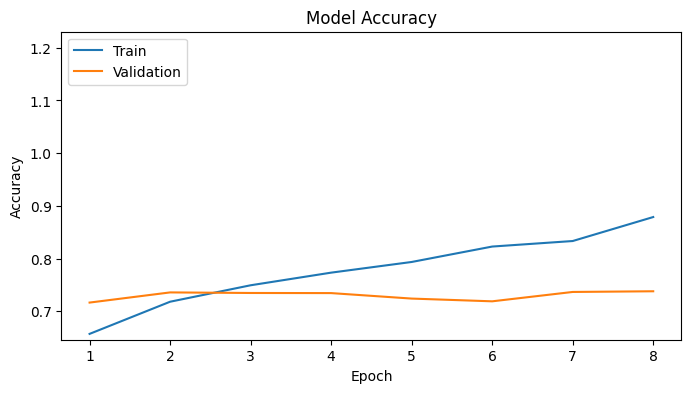

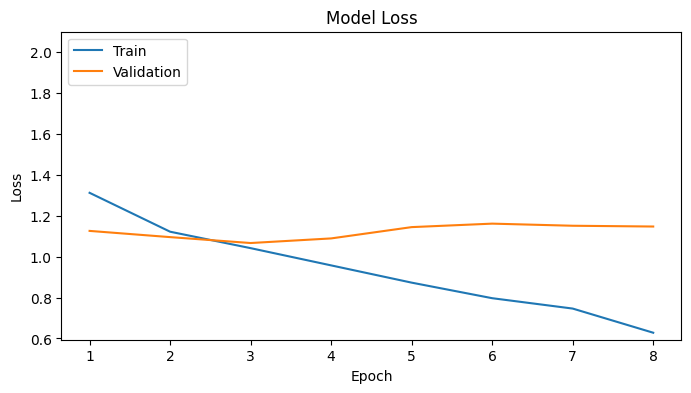

In [ ]:
# Evaluate the model on the validation data (for resnet50)
validation_steps = tf.data.experimental.cardinality(val_pose_ds).numpy()
validation_loss, validation_accuracy = model.evaluate(val_pose_ds, steps=validation_steps)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Determine the number of epochs from the history data
num_epochs = len(history.history['accuracy'])
# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['accuracy'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_accuracy = max(max(history.history['accuracy']), max(history.history['val_accuracy']))
plt.ylim(top=max_accuracy * 1.4)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['loss'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.ylim(top=max_loss * 1.6)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()


250/250 [==============================] - 25s 101ms/step - loss: 1.1414 - accuracy: 0.7389
Test accuracy: 0.7389
Test loss: 1.1414
250/250 [==============================] - 26s 98ms/step


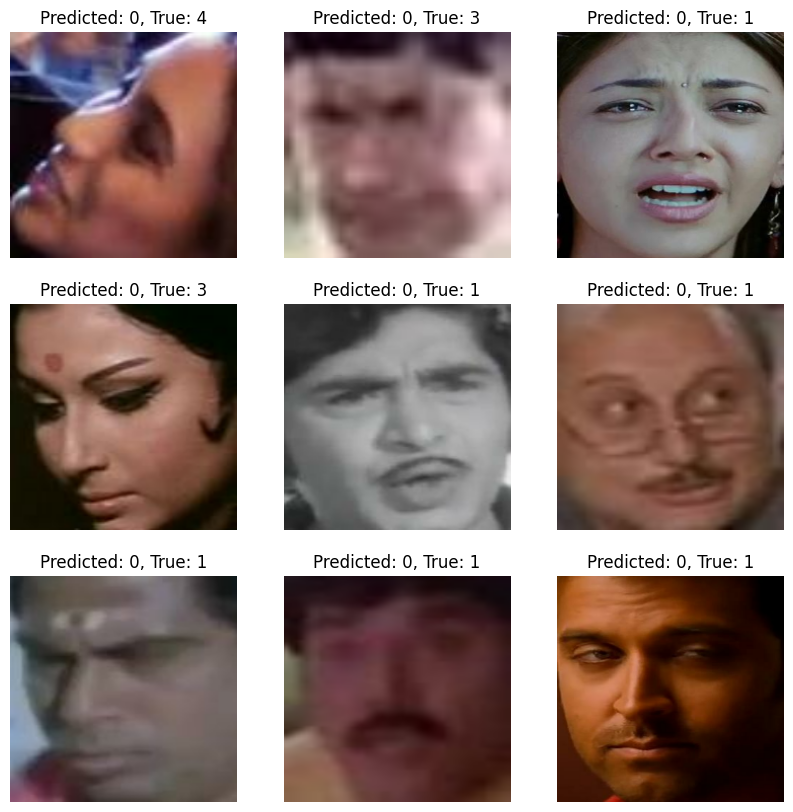

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_pose_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_pose_ds)


# threshold (commonly 0.5) to determine the class labels
binary_predictions = (predictions > 0.5).astype(int)

# visualize the predictions along with the images and true labels
for images, labels in test_pose_ds.take(1):
    for i in range(9):  # Display the first 9 images from this batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {binary_predictions[i][0]}, True: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

#Expressions:

In [ ]:
print(df['Expressions '].unique())

['DISGUST' 'HAPPINESS' 'NEUTRAL' 'ANGER' 'SURPRISE' 'FEAR' 'SADNESS']


In [ ]:
os.mkdir("train/EXPRESSIONS")
os.mkdir("test/EXPRESSIONS")

os.mkdir("train/EXPRESSIONS/DISGUST")
os.mkdir("train/EXPRESSIONS/HAPPINESS")
os.mkdir("train/EXPRESSIONS/NEUTRAL")
os.mkdir("train/EXPRESSIONS/ANGER")
os.mkdir("train/EXPRESSIONS/SURPRISE")
os.mkdir("train/EXPRESSIONS/FEAR")
os.mkdir("train/EXPRESSIONS/SADNESS")

os.mkdir("test/EXPRESSIONS/DISGUST")
os.mkdir("test/EXPRESSIONS/HAPPINESS")
os.mkdir("test/EXPRESSIONS/NEUTRAL")
os.mkdir("test/EXPRESSIONS/ANGER")
os.mkdir("test/EXPRESSIONS/SURPRISE")
os.mkdir("test/EXPRESSIONS/FEAR")
os.mkdir("test/EXPRESSIONS/SADNESS")

In [ ]:
for i in range(X_train.shape[0]):
  location = X_train["imagepath"][i]
  expressions = X_train["Expressions "][i]
  name = Path(location).name
  if expressions  == "DISGUST":
    dest = os.path.join("/content/train/EXPRESSIONS/DISGUST",name)
  elif expressions  == "HAPPINESS":
    dest = os.path.join("/content/train/EXPRESSIONS/HAPPINESS",name)
  elif expressions  == "NEUTRAL":
    dest = os.path.join("/content/train/EXPRESSIONS/NEUTRAL",name)
  elif expressions  == "ANGER":
    dest = os.path.join("/content/train/EXPRESSIONS/ANGER",name)
  elif expressions  == "HAPPINESS":
    dest = os.path.join("/content/train/EXPRESSIONS/HAPPINESS",name)
  elif expressions  == "NEUTRAL":
    dest = os.path.join("/content/train/EXPRESSIONS/NEUTRAL",name)
  elif expressions  == "ANGER":
    dest = os.path.join("/content/train/EXPRESSIONS/ANGER",name)


  shutil.copy(location,dest)


for i in range(X_test.shape[0]):
  location = X_test["imagepath"][i]
  expressions = X_test["Expressions "][i]
  name = Path(location).name
  if expressions  == "DISGUST":
    dest = os.path.join("/content/test/EXPRESSIONS/DISGUST",name)
  elif expressions  == "HAPPINESS":
    dest = os.path.join("/content/test/EXPRESSIONS/HAPPINESS",name)
  elif expressions  == "NEUTRAL":
    dest = os.path.join("/content/test/EXPRESSIONS/NEUTRAL",name)
  elif expressions  == "ANGER":
    dest = os.path.join("/content/test/EXPRESSIONS/ANGER",name)
  elif expressions  == "HAPPINESS":
    dest = os.path.join("/content/test/EXPRESSIONS/HAPPINESS",name)
  elif expressions  == "NEUTRAL":
    dest = os.path.join("/content/test/EXPRESSIONS/NEUTRAL",name)
  elif expressions  == "ANGER":
    dest = os.path.join("/content/test/EXPRESSIONS/ANGER",name)


  shutil.copy(location,dest)


In [ ]:
trainPath_EXP = "/content/train/EXPRESSIONS"
testPath_EXP = "/content/test/EXPRESSIONS"

In [ ]:
# load the Train images
train_exp_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_EXP,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="training")


val_exp_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_EXP,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="validation")


# load the Test images
test_exp_ds = tf.keras.utils.image_dataset_from_directory(
  testPath_EXP,
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)

Found 12291 files belonging to 7 classes.
Using 8604 files for training.
Found 12291 files belonging to 7 classes.
Using 3687 files for validation.
Found 6361 files belonging to 7 classes.


In [ ]:
for image_batch, labels_batch in train_exp_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
num_classes_exp = len(df['Expressions '].unique())
print(num_classes_exp)

7


In [ ]:
# CNN Model Structure

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes_exp) )

#Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_exp_ds,
    epochs=20,
    validation_data=val_exp_ds)


Epoch 1/20
269/269 [==============================] - 21s 69ms/step - loss: 3.3254 - accuracy: 0.3620 - val_loss: 1.3049 - val_accuracy: 0.3838
Epoch 2/20
269/269 [==============================] - 14s 51ms/step - loss: 1.2877 - accuracy: 0.3906 - val_loss: 1.2888 - val_accuracy: 0.4163
Epoch 3/20
269/269 [==============================] - 14s 51ms/step - loss: 1.2326 - accuracy: 0.4331 - val_loss: 1.2868 - val_accuracy: 0.4234
Epoch 4/20
269/269 [==============================] - 14s 51ms/step - loss: 1.1731 - accuracy: 0.4677 - val_loss: 1.3308 - val_accuracy: 0.4209
Epoch 5/20
269/269 [==============================] - 14s 51ms/step - loss: 1.0939 - accuracy: 0.5108 - val_loss: 1.4513 - val_accuracy: 0.4288
Epoch 6/20
269/269 [==============================] - 14s 51ms/step - loss: 1.0336 - accuracy: 0.5434 - val_loss: 1.5526 - val_accuracy: 0.3982
Epoch 7/20
269/269 [==============================] - 14s 51ms/step - loss: 0.9672 - accuracy: 0.5755 - val_loss: 1.7050 - val_accuracy:

In [ ]:
# Model Architecture with Batch Normalization and Spatial Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.5))  # Spatial Dropout
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(num_classes_exp))

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.001)

# Train the model
history = model.fit(
    train_exp_ds,
    epochs=20,
    validation_data=val_exp_ds,
    callbacks=[early_stopping, reduce_lr]  # Include both callbacks
)


Epoch 1/20
269/269 [==============================] - 32s 114ms/step - loss: 1.6499 - accuracy: 0.3645 - val_loss: 1.5705 - val_accuracy: 0.3925 - lr: 0.0100
Epoch 2/20
269/269 [==============================] - 31s 115ms/step - loss: 1.4723 - accuracy: 0.4039 - val_loss: 1.4479 - val_accuracy: 0.4215 - lr: 0.0100
Epoch 3/20
269/269 [==============================] - 30s 112ms/step - loss: 1.4334 - accuracy: 0.4111 - val_loss: 1.4244 - val_accuracy: 0.4407 - lr: 0.0100
Epoch 4/20
269/269 [==============================] - 30s 112ms/step - loss: 1.4013 - accuracy: 0.4284 - val_loss: 1.4143 - val_accuracy: 0.4369 - lr: 0.0100
Epoch 5/20
269/269 [==============================] - 30s 112ms/step - loss: 1.3604 - accuracy: 0.4467 - val_loss: 1.4064 - val_accuracy: 0.4331 - lr: 0.0100
Epoch 6/20
269/269 [==============================] - 30s 112ms/step - loss: 1.3349 - accuracy: 0.4560 - val_loss: 1.4069 - val_accuracy: 0.4345 - lr: 0.0100
Epoch 7/20
269/269 [==============================] 

In [ ]:
#transfer learning

# Load the VGG16 model, pre-trained on ImageNet data, without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes_exp, activation='softmax')
])

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Train the model
history = model.fit(
    train_exp_ds,
    epochs=20,
    validation_data=val_exp_ds,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
269/269 [==============================] - 56s 201ms/step - loss: 5.7407 - accuracy: 0.3756 - val_loss: 6.9661 - val_accuracy: 0.4095 - lr: 0.0100
Epoch 2/20
269/269 [==============================] - 51s 188ms/step - loss: 6.6509 - accuracy: 0.4341 - val_loss: 6.3318 - val_accuracy: 0.4576 - lr: 0.0100
Epoch 3/20
269/269 [==============================] - 55s 206ms/step - loss: 6.0478 - accuracy: 0.4729 - val_loss: 5.8260 - val_accuracy: 0.4516 - lr: 0.0100
Epoch 4/20
269/269 [==============================] - 56s 207ms/step - loss: 5.5080 - accuracy: 0.5131 - val_loss: 5.3797 - val_accuracy: 0.4470 - lr: 0.0100
Epoch 5/20
269/269 [==============================] - 55s 204ms/step - loss: 5.0167 - accuracy: 0.5443 - val_loss: 4.9650 - val_accuracy: 0.4616 - lr: 0.0100
Epoch 6/20
269/269 [==============================] - 50s 184ms/step - loss: 4.6273 - accuracy: 0.5729 - val_loss: 4.9084 - val_accuracy: 0.4418 - lr: 0.0100
Epoch 7/20
269/269 [==============================] 

In [ ]:
# Evaluate the model on the test set (for VGG)
test_loss, test_accuracy = model.evaluate(test_exp_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_exp_ds)


# threshold (commonly 0.5) to determine the class labels
binary_predictions = (predictions > 0.5).astype(int)


199/199 [==============================] - 28s 136ms/step - loss: 2.7813 - accuracy: 0.4120
Test accuracy: 0.4120
Test loss: 2.7813
199/199 [==============================] - 24s 120ms/step


In [ ]:


# Load the ResNet50 model, pre-trained on ImageNet data, without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes_exp, activation='softmax')
])

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.001)

# Train the model
history = model.fit(
    train_exp_ds,
    epochs=20,
    validation_data=val_exp_ds,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
269/269 [==============================] - 56s 180ms/step - loss: 1.7788 - accuracy: 0.3596 - val_loss: 1.5490 - val_accuracy: 0.4269 - lr: 0.0100
Epoch 2/20
269/269 [==============================] - 38s 139ms/step - loss: 1.5386 - accuracy: 0.4213 - val_loss: 1.4845 - val_accuracy: 0.4510 - lr: 0.0100
Epoch 3/20
269/269 [==============================] - 47s 176ms/step - loss: 1.4654 - accuracy: 0.4575 - val_loss: 1.4721 - val_accuracy: 0.4494 - lr: 0.0100
Epoch 4/20
269/269 [==============================] - 38s 141ms/step - loss: 1.3884 - accuracy: 0.4898 - val_loss: 1.4399 - val_accuracy: 0.4557 - lr: 0.0100
Epoch 5/20
269/269 [==============================] - 39s 144ms/step - loss: 1.3099 - accuracy: 0.5418 - val_loss: 1.5064 - val_accuracy: 0.4405 - lr: 0.0100
Epoch 6/20
269/269 [==============================] - 38s 141ms/step - loss: 1.2764 - accuracy: 0.5506 - val_loss: 1.4997 - val_accuracy: 0.4624 - lr: 0.0100
Epoch 7/20
269/269 [==============================] 

116/116 [==============================] - 11s 95ms/step - loss: 1.5257 - accuracy: 0.4746
Validation Loss: 1.5257222652435303
Validation Accuracy: 0.4746406376361847


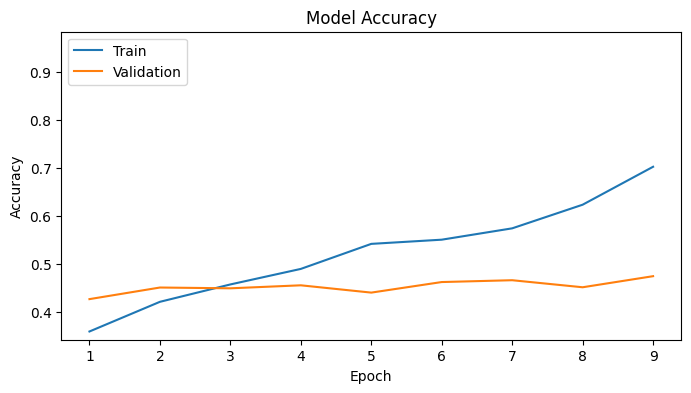

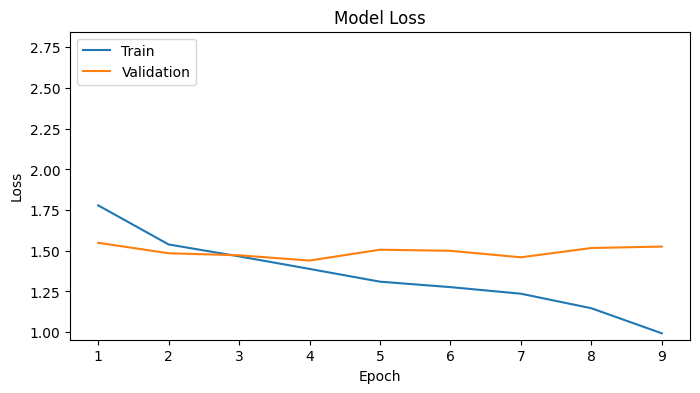

In [ ]:
# Evaluate the model on the validation data
validation_steps = tf.data.experimental.cardinality(val_exp_ds).numpy()
validation_loss, validation_accuracy = model.evaluate(val_exp_ds, steps=validation_steps)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Determine the number of epochs from the history data
num_epochs = len(history.history['accuracy'])

# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['accuracy'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_accuracy = max(max(history.history['accuracy']), max(history.history['val_accuracy']))
plt.ylim(top=max_accuracy * 1.4)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['loss'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.ylim(top=max_loss * 1.6)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()


In [ ]:
# Evaluate the model on the test set (for resnet50)
test_loss, test_accuracy = model.evaluate(test_exp_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_exp_ds)


# threshold (commonly 0.5) to determine the class labels
binary_predictions = (predictions > 0.5).astype(int)



199/199 [==============================] - 21s 102ms/step - loss: 1.5354 - accuracy: 0.4844
Test accuracy: 0.4844
Test loss: 1.5354
199/199 [==============================] - 19s 92ms/step


#AGE_GENDER:

In [ ]:
print(df['Age_Gender'].unique())

['YOUNG_MALE' 'OLD_MALE' 'YOUNG_FEMALE' 'MIDDLE_MALE' 'CHILD_MALE'
 'MIDDLE_FEMALE' 'OLD_FEMALE']


In [ ]:
os.mkdir("train/AGE_GENDER")
os.mkdir("test/AGE_GENDER")

os.mkdir("train/AGE_GENDER/YOUNG_MALE")
os.mkdir("train/AGE_GENDER/YOUNG_FEMALE")
os.mkdir("train/AGE_GENDER/OLD_MALE")
os.mkdir("train/AGE_GENDER/OLD_FEMALE")
os.mkdir("train/AGE_GENDER/MIDDLE_MALE")
os.mkdir("train/AGE_GENDER/MIDDLE_FEMALE")
os.mkdir("train/AGE_GENDER/CHILD_MALE")


os.mkdir("test/AGE_GENDER/YOUNG_MALE")
os.mkdir("test/AGE_GENDER/YOUNG_FEMALE")
os.mkdir("test/AGE_GENDER/OLD_MALE")
os.mkdir("test/AGE_GENDER/OLD_FEMALE")
os.mkdir("test/AGE_GENDER/MIDDLE_MALE")
os.mkdir("test/AGE_GENDER/MIDDLE_FEMALE")
os.mkdir("test/AGE_GENDER/CHILD_MALE")



In [ ]:
for i in range(X_train.shape[0]):
  location = X_train["imagepath"][i]
  age_gender = X_train["Age_Gender"][i]
  name = Path(location).name
  if age_gender  == "YOUNG_MALE":
    dest = os.path.join("/content/train/AGE_GENDER/YOUNG_MALE",name)
  elif age_gender  == "YOUNG_FEMALE":
    dest = os.path.join("/content/train/AGE_GENDER/YOUNG_FEMALE",name)
  elif age_gender  == "OLD_MALE":
    dest = os.path.join("/content/train/AGE_GENDER/OLD_MALE",name)
  elif age_gender  == "OLD_FEMALE":
    dest = os.path.join("/content/train/AGE_GENDER/OLD_FEMALE",name)
  elif age_gender  == "MIDDLE_MALE":
    dest = os.path.join("/content/train/AGE_GENDER/MIDDLE_MALE",name)
  elif age_gender  == "MIDDLE_FEMALE":
    dest = os.path.join("/content/train/AGE_GENDER/MIDDLE_FEMALE",name)
  elif age_gender  == "CHILD_MALE":
    dest = os.path.join("/content/train/AGE_GENDER/CHILD_MALE",name)


  shutil.copy(location,dest)


for i in range(X_test.shape[0]):
  location = X_test["imagepath"][i]
  age_gender = X_test["Age_Gender"][i]
  name = Path(location).name
  if age_gender  == "YOUNG_MALE":
    dest = os.path.join("/content/test/AGE_GENDER/YOUNG_MALE",name)
  elif age_gender  == "YOUNG_FEMALE":
    dest = os.path.join("/content/test/AGE_GENDER/YOUNG_FEMALE",name)
  elif age_gender  == "OLD_MALE":
    dest = os.path.join("/content/test/AGE_GENDER/OLD_MALE",name)
  elif age_gender  == "OLD_FEMALE":
    dest = os.path.join("/content/test/AGE_GENDER/OLD_FEMALE",name)
  elif age_gender  == "MIDDLE_MALE":
    dest = os.path.join("/content/test/AGE_GENDER/MIDDLE_MALE",name)
  elif age_gender  == "MIDDLE_FEMALE":
    dest = os.path.join("/content/test/AGE_GENDER/MIDDLE_FEMALE",name)
  elif age_gender  == "CHILD_MALE":
    dest = os.path.join("/content/test/AGE_GENDER/CHILD_MALE",name)


  shutil.copy(location,dest)


In [ ]:
trainPath_AGE_GENDER = "/content/train/AGE_GENDER"
testPath_AGE_GENDER = "/content/test/AGE_GENDER"

In [ ]:
# load the Train images
train_age_gender_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_AGE_GENDER,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="training")


val_age_gender_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_AGE_GENDER,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="validation")


# load the Test images
test_age_gender_ds = tf.keras.utils.image_dataset_from_directory(
  testPath_AGE_GENDER,
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)

Found 13791 files belonging to 7 classes.
Using 9654 files for training.
Found 13791 files belonging to 7 classes.
Using 4137 files for validation.
Found 7515 files belonging to 7 classes.


In [ ]:
for image_batch, labels_batch in train_age_gender_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
num_classes_age_gender = len(df['Age_Gender'].unique())
print(num_classes_age_gender)

7


In [ ]:
# CNN Model Structure

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes_age_gender) )

#Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])




# Train the model
history = model.fit(
    train_age_gender_ds,
    epochs=20,
    validation_data=val_age_gender_ds)




Epoch 1/20
302/302 [==============================] - 25s 68ms/step - loss: 3.8598 - accuracy: 0.4655 - val_loss: 1.3687 - val_accuracy: 0.5149
Epoch 2/20
302/302 [==============================] - 15s 50ms/step - loss: 1.2424 - accuracy: 0.5563 - val_loss: 1.3410 - val_accuracy: 0.5079
Epoch 3/20
302/302 [==============================] - 15s 49ms/step - loss: 1.1351 - accuracy: 0.5912 - val_loss: 1.2670 - val_accuracy: 0.5499
Epoch 4/20
302/302 [==============================] - 15s 50ms/step - loss: 0.9672 - accuracy: 0.6482 - val_loss: 1.4931 - val_accuracy: 0.5103
Epoch 5/20
302/302 [==============================] - 15s 50ms/step - loss: 0.8566 - accuracy: 0.6888 - val_loss: 1.4300 - val_accuracy: 0.5622
Epoch 6/20
302/302 [==============================] - 17s 57ms/step - loss: 0.6941 - accuracy: 0.7475 - val_loss: 1.6704 - val_accuracy: 0.5395
Epoch 7/20
302/302 [==============================] - 16s 52ms/step - loss: 0.5879 - accuracy: 0.7899 - val_loss: 1.8187 - val_accuracy:

In [ ]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SpatialDropout2D(0.5))  # Spatial Dropout
model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dense(num_classes_age_gender))



# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.001)

# Train the model
history = model.fit(
    train_age_gender_ds,
    epochs=20,
    validation_data=val_age_gender_ds,
    callbacks=[early_stopping, reduce_lr]  # Include both callbacks
)


Epoch 1/20
302/302 [==============================] - 49s 141ms/step - loss: 1.5681 - accuracy: 0.4956 - val_loss: 1.4092 - val_accuracy: 0.5144 - lr: 0.0100
Epoch 2/20
302/302 [==============================] - 37s 123ms/step - loss: 1.3158 - accuracy: 0.5734 - val_loss: 1.3242 - val_accuracy: 0.5465 - lr: 0.0100
Epoch 3/20
302/302 [==============================] - 39s 128ms/step - loss: 1.2350 - accuracy: 0.6017 - val_loss: 1.2134 - val_accuracy: 0.6082 - lr: 0.0100
Epoch 4/20
302/302 [==============================] - 37s 123ms/step - loss: 1.1599 - accuracy: 0.6246 - val_loss: 1.1884 - val_accuracy: 0.6067 - lr: 0.0100
Epoch 5/20
302/302 [==============================] - 39s 129ms/step - loss: 1.0997 - accuracy: 0.6518 - val_loss: 1.1327 - val_accuracy: 0.6326 - lr: 0.0100
Epoch 6/20
302/302 [==============================] - 37s 124ms/step - loss: 1.0323 - accuracy: 0.6700 - val_loss: 1.1601 - val_accuracy: 0.6212 - lr: 0.0100
Epoch 7/20
302/302 [==============================] 

In [ ]:
# Load the ResNet50 model, pre-trained on ImageNet data, without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes_age_gender, activation='softmax')
])

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.001)

# Train the model
history = model.fit(
    train_age_gender_ds,
    epochs=20,
    validation_data=val_age_gender_ds,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
302/302 [==============================] - 49s 142ms/step - loss: 1.7019 - accuracy: 0.5362 - val_loss: 1.3644 - val_accuracy: 0.6522 - lr: 0.0100
Epoch 2/20
302/302 [==============================] - 42s 138ms/step - loss: 1.3354 - accuracy: 0.6440 - val_loss: 1.2512 - val_accuracy: 0.6691 - lr: 0.0100
Epoch 3/20
302/302 [==============================] - 42s 138ms/step - loss: 1.1576 - accuracy: 0.6968 - val_loss: 1.2350 - val_accuracy: 0.6650 - lr: 0.0100
Epoch 4/20
302/302 [==============================] - 42s 140ms/step - loss: 0.9956 - accuracy: 0.7540 - val_loss: 1.1005 - val_accuracy: 0.7254 - lr: 0.0100
Epoch 5/20
302/302 [==============================] - 42s 140ms/step - loss: 0.8884 - accuracy: 0.7955 - val_loss: 1.2552 - val_accuracy: 0.6768 - lr: 0.0100
Epoch 6/20
302/302 [==============================] - 43s 141ms/step - loss: 0.8134 - accuracy: 0.8175 - val_loss: 1.1834 - val_accuracy: 0.7063 - lr: 0.0100
Epoch 7/20
302/302 [==============================] 

130/130 [==============================] - 14s 102ms/step - loss: 1.1805 - accuracy: 0.7549
Validation Loss: 1.180463194847107
Validation Accuracy: 0.7548948526382446


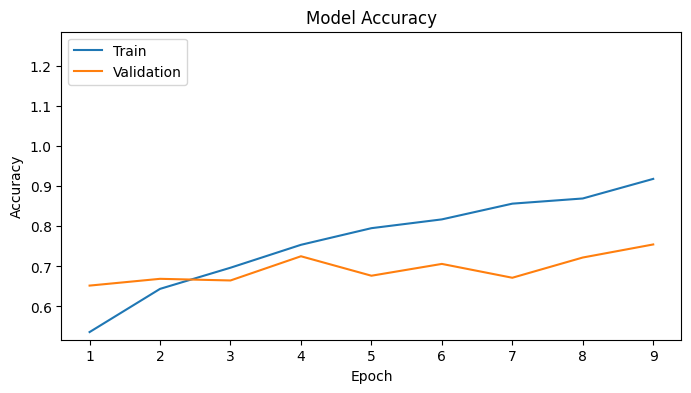

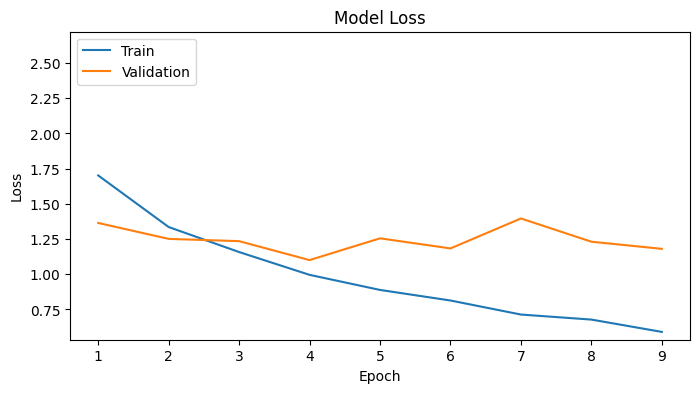

In [ ]:
# Evaluate the model on the validation data
validation_steps = tf.data.experimental.cardinality(val_age_gender_ds).numpy()
validation_loss, validation_accuracy = model.evaluate(val_age_gender_ds, steps=validation_steps)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Determine the number of epochs from the history data
num_epochs = len(history.history['accuracy'])
# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['accuracy'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_accuracy = max(max(history.history['accuracy']), max(history.history['val_accuracy']))
plt.ylim(top=max_accuracy * 1.4)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['loss'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.ylim(top=max_loss * 1.6)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_age_gender_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_age_gender_ds)


# threshold (commonly 0.5) to determine the class labels
binary_predictions = (predictions > 0.5).astype(int)




235/235 [==============================] - 23s 98ms/step - loss: 1.1461 - accuracy: 0.7594
Test accuracy: 0.7594
Test loss: 1.1461
235/235 [==============================] - 23s 95ms/step


#MAKEUP_Illumination:

In [ ]:
print(df['Makeup_Illumination'].unique())

['PARTIAL_MEDIUM' 'PARTIAL_BAD' 'PARTIAL_HIGH' 'OVER_MEDIUM' 'OVER_BAD'
 'OVER_HIGH']


In [ ]:
os.mkdir("train/MAKEUP_ILLUMINATION")
os.mkdir("test/MAKEUP_ILLUMINATION")

os.mkdir("train/MAKEUP_ILLUMINATION/PARTIAL_MEDIUM")
os.mkdir("train/MAKEUP_ILLUMINATION/PARTIAL_BAD")
os.mkdir("train/MAKEUP_ILLUMINATION/PARTIAL_HIGH")
os.mkdir("train/MAKEUP_ILLUMINATION/OVER_MEDIUM")
os.mkdir("train/MAKEUP_ILLUMINATION/OVER_BAD")
os.mkdir("train/MAKEUP_ILLUMINATION/OVER_HIGH")


os.mkdir("test/MAKEUP_ILLUMINATION/PARTIAL_MEDIUM")
os.mkdir("test/MAKEUP_ILLUMINATION/PARTIAL_BAD")
os.mkdir("test/MAKEUP_ILLUMINATION/PARTIAL_HIGH")
os.mkdir("test/MAKEUP_ILLUMINATION/OVER_MEDIUM")
os.mkdir("test/MAKEUP_ILLUMINATION/OVER_BAD")
os.mkdir("test/MAKEUP_ILLUMINATION/OVER_HIGH")



In [ ]:
for i in range(X_train.shape[0]):
  location = X_train["imagepath"][i]
  makeup_illumination = X_train["Makeup_Illumination"][i]
  name = Path(location).name
  if makeup_illumination  == "PARTIAL_MEDIUM":
    dest = os.path.join("/content/train/MAKEUP_ILLUMINATION/PARTIAL_MEDIUM",name)
  elif makeup_illumination  == "PARTIAL_BAD":
    dest = os.path.join("/content/train/MAKEUP_ILLUMINATION/PARTIAL_BAD",name)
  elif makeup_illumination  == "PARTIAL_HIGH":
    dest = os.path.join("/content/train/MAKEUP_ILLUMINATION/PARTIAL_HIGH",name)
  elif makeup_illumination  == "OVER_MEDIUM":
    dest = os.path.join("/content/train/MAKEUP_ILLUMINATION/OVER_MEDIUM",name)
  elif makeup_illumination  == "OVER_BAD":
    dest = os.path.join("/content/train/MAKEUP_ILLUMINATION/OVER_BAD",name)
  elif makeup_illumination  == "OVER_HIGH":
    dest = os.path.join("/content/train/MAKEUP_ILLUMINATION/OVER_HIGH",name)



  shutil.copy(location,dest)


for i in range(X_test.shape[0]):
  location = X_test["imagepath"][i]
  makeup_illumination = X_test["Makeup_Illumination"][i]
  name = Path(location).name
  if makeup_illumination  == "PARTIAL_MEDIUM":
    dest = os.path.join("/content/test/MAKEUP_ILLUMINATION/PARTIAL_MEDIUM",name)
  elif makeup_illumination  == "PARTIAL_BAD":
    dest = os.path.join("/content/test/MAKEUP_ILLUMINATION/PARTIAL_BAD",name)
  elif makeup_illumination  == "PARTIAL_HIGH":
    dest = os.path.join("/content/test/MAKEUP_ILLUMINATION/PARTIAL_HIGH",name)
  elif makeup_illumination  == "OVER_MEDIUM":
    dest = os.path.join("/content/test/MAKEUP_ILLUMINATION/OVER_MEDIUM",name)
  elif makeup_illumination  == "OVER_BAD":
    dest = os.path.join("/content/test/MAKEUP_ILLUMINATION/OVER_BAD",name)
  elif makeup_illumination  == "OVER_HIGH":
    dest = os.path.join("/content/test/MAKEUP_ILLUMINATION/OVER_HIGH",name)


  shutil.copy(location,dest)


In [ ]:
trainPath_MAKEUP_ILLUMINATION = "/content/train/MAKEUP_ILLUMINATION"
testPath_MAKEUP_ILLUMINATION = "/content/test/MAKEUP_ILLUMINATION"

In [ ]:
# load the Train images
train_makeup_illu_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_MAKEUP_ILLUMINATION,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="training")


val_makeup_illu_ds = tf.keras.utils.image_dataset_from_directory(
  trainPath_MAKEUP_ILLUMINATION,
  image_size=IMG_SIZE,
  seed=123, # Providing random seed to reproduce the same results each time we run the code
  batch_size=batch_size,
  validation_split=0.3,
  subset="validation")


# load the Test images
test_makeup_illu_ds = tf.keras.utils.image_dataset_from_directory(
  testPath_MAKEUP_ILLUMINATION,
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)

Found 14354 files belonging to 6 classes.
Using 10048 files for training.
Found 14354 files belonging to 6 classes.
Using 4306 files for validation.
Found 7648 files belonging to 6 classes.


In [ ]:
for image_batch, labels_batch in train_makeup_illu_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
num_classes_makeup_illu = len(df['Makeup_Illumination'].unique())
print(num_classes_makeup_illu)

6


In [ ]:
# CNN Model Structure

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes_makeup_illu) )

#Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])


# Train the model
history = model.fit(
    train_makeup_illu_ds,
    epochs=20,
    validation_data=val_makeup_illu_ds)



Epoch 1/20
314/314 [==============================] - 24s 63ms/step - loss: 4.4046 - accuracy: 0.6021 - val_loss: 1.0883 - val_accuracy: 0.6389
Epoch 2/20
314/314 [==============================] - 16s 50ms/step - loss: 0.9679 - accuracy: 0.6352 - val_loss: 0.9697 - val_accuracy: 0.6226
Epoch 3/20
314/314 [==============================] - 16s 50ms/step - loss: 0.8674 - accuracy: 0.6491 - val_loss: 1.0820 - val_accuracy: 0.6277
Epoch 4/20
314/314 [==============================] - 15s 49ms/step - loss: 0.7825 - accuracy: 0.6761 - val_loss: 1.1843 - val_accuracy: 0.6389
Epoch 5/20
314/314 [==============================] - 16s 51ms/step - loss: 0.6939 - accuracy: 0.7067 - val_loss: 1.2956 - val_accuracy: 0.6198
Epoch 6/20
314/314 [==============================] - 16s 50ms/step - loss: 0.6070 - accuracy: 0.7474 - val_loss: 1.4799 - val_accuracy: 0.6024
Epoch 7/20
314/314 [==============================] - 15s 49ms/step - loss: 0.5533 - accuracy: 0.7730 - val_loss: 1.7113 - val_accuracy:

In [ ]:


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(SpatialDropout2D(0.5))  # Spatial Dropout
model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dense(num_classes_makeup_illu))



# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(
    train_makeup_illu_ds,
    epochs=20,
    validation_data=val_makeup_illu_ds,
    callbacks=[early_stopping, reduce_lr]  # Include both callbacks
)


Epoch 1/20
314/314 [==============================] - 41s 125ms/step - loss: 1.1481 - accuracy: 0.6245 - val_loss: 1.0395 - val_accuracy: 0.6472 - lr: 0.0100
Epoch 2/20
314/314 [==============================] - 39s 123ms/step - loss: 0.9929 - accuracy: 0.6595 - val_loss: 1.0107 - val_accuracy: 0.6535 - lr: 0.0100
Epoch 3/20
314/314 [==============================] - 40s 127ms/step - loss: 0.9481 - accuracy: 0.6670 - val_loss: 0.9523 - val_accuracy: 0.6721 - lr: 0.0100
Epoch 4/20
314/314 [==============================] - 40s 126ms/step - loss: 0.9122 - accuracy: 0.6727 - val_loss: 0.9100 - val_accuracy: 0.6867 - lr: 0.0100
Epoch 5/20
314/314 [==============================] - 39s 124ms/step - loss: 0.8759 - accuracy: 0.6823 - val_loss: 0.9066 - val_accuracy: 0.6872 - lr: 0.0100
Epoch 6/20
314/314 [==============================] - 39s 123ms/step - loss: 0.8432 - accuracy: 0.6893 - val_loss: 0.9304 - val_accuracy: 0.6698 - lr: 0.0100
Epoch 7/20
314/314 [==============================] 

In [ ]:
# Load the ResNet50 model, pre-trained on ImageNet data, without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes_makeup_illu, activation='softmax')
])

# Using SGD Optimizer with a starting learning rate
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callbacks: Early Stopping and Reduce Learning Rate on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.001)

# Train the model
history = model.fit(
    train_makeup_illu_ds,
    epochs=20,
    validation_data=val_makeup_illu_ds,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
314/314 [==============================] - 51s 147ms/step - loss: 1.2585 - accuracy: 0.6309 - val_loss: 1.1221 - val_accuracy: 0.6823 - lr: 0.0100
Epoch 2/20
314/314 [==============================] - 45s 143ms/step - loss: 1.0824 - accuracy: 0.6749 - val_loss: 1.0322 - val_accuracy: 0.6918 - lr: 0.0100
Epoch 3/20
314/314 [==============================] - 46s 145ms/step - loss: 1.0052 - accuracy: 0.6936 - val_loss: 1.0113 - val_accuracy: 0.6988 - lr: 0.0100
Epoch 4/20
314/314 [==============================] - 53s 168ms/step - loss: 0.9185 - accuracy: 0.7174 - val_loss: 0.9839 - val_accuracy: 0.6948 - lr: 0.0100
Epoch 5/20
314/314 [==============================] - 45s 144ms/step - loss: 0.8354 - accuracy: 0.7551 - val_loss: 1.0426 - val_accuracy: 0.6723 - lr: 0.0100
Epoch 6/20
314/314 [==============================] - 45s 143ms/step - loss: 0.7866 - accuracy: 0.7691 - val_loss: 1.1050 - val_accuracy: 0.6607 - lr: 0.0100
Epoch 7/20
314/314 [==============================] 

135/135 [==============================] - 14s 99ms/step - loss: 1.1039 - accuracy: 0.6791
Validation Loss: 1.1039315462112427
Validation Accuracy: 0.679052472114563


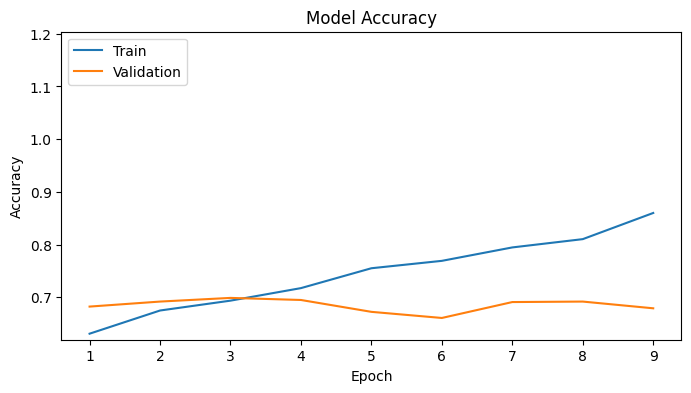

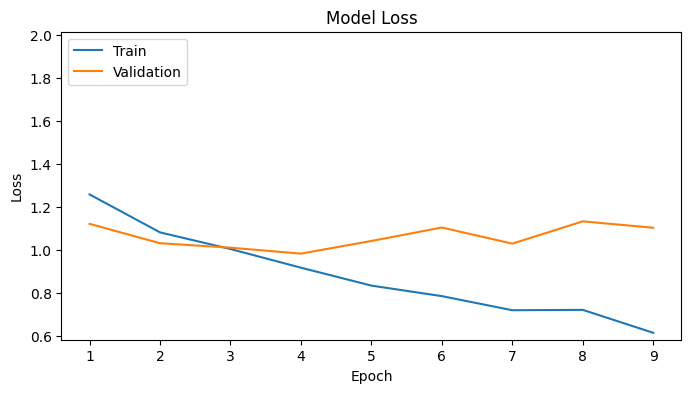

In [ ]:
# Evaluate the model on the validation data
validation_steps = tf.data.experimental.cardinality(val_makeup_illu_ds).numpy()
validation_loss, validation_accuracy = model.evaluate(val_makeup_illu_ds, steps=validation_steps)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Determine the number of epochs from the history data
num_epochs = len(history.history['accuracy'])

# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['accuracy'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_accuracy = max(max(history.history['accuracy']), max(history.history['val_accuracy']))
plt.ylim(top=max_accuracy * 1.4)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), history.history['loss'])  # Adjust x-axis values to start from 1
plt.plot(range(1, num_epochs + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.ylim(top=max_loss * 1.6)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks starting from 1
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_makeup_illu_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_makeup_illu_ds)


# threshold (commonly 0.5) to determine the class labels
binary_predictions = (predictions > 0.5).astype(int)



239/239 [==============================] - 25s 102ms/step - loss: 1.0808 - accuracy: 0.6978
Test accuracy: 0.6978
Test loss: 1.0808
239/239 [==============================] - 24s 98ms/step
